# Heart Disease Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.graph_objs as go
import plotly.offline as py

## Data Overview:

In [2]:
# Heart Disease Classificaiton Data Set from UCI Machine Learning Repository
df = pd.read_csv("~/Desktop/Winter_2020/Cogs_118A/FinalProject/Cogs118A_FinalProject/Data/heart.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

**About this Data Set**:  

**Used with permission of instructor**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). (1)
  
**Target feature**:  

 -  **target**: does the patient have heart disease? (1=yes, 0=no)
   
**Feature Values**:  
 - **age**: age in years  
 - **sex**: sex (1=male; 0=female)  
 - **cp**: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)    
 - **trestbps**: resting blood pressure (in mm Hg on admission to hospital)  
 - **chol**: serum cholesterol in mg/dl  
 - **fbs**: (fasting blood sugar > 120 mg/dl)(1=true; 0=false)  
 - **restecg**: resting electrocardiographic results
 - **thalach**: maximum heart rate achieved  
 - **exang**: exercise induced angina (1=yes; 0=no)  
 - **oldpeak**: ST depression induced by exercise relative to rest  
 - **slope**: the slope of the peak exercise ST segment
 - **ca**: number of major vessels (0-3) colored by fluoroscopy
 - **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect

Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease (1)

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
# types of targets for classification
df['target'].unique()

array([1, 0], dtype=int64)

In [6]:
df.shape

(303, 14)

In [7]:
df.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

In [8]:
target_column = ['target']
feature_columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
age = ['age']

### Data Distributions

### Heart Disease (target value)

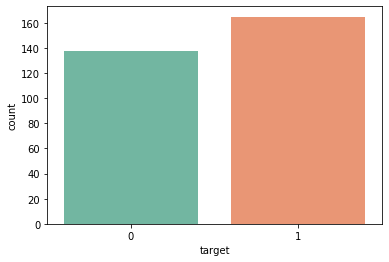

In [9]:
# plot number of patients with heart disease and without
sns.countplot(x="target", data=df, palette="Set2")
plt.show()

In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
HeartDisease = len(df[df.target == 1])
NoHeartDisease = len(df[df.target == 0])
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((HeartDisease / (len(df.target))*100)))
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((NoHeartDisease / (len(df.target))*100)))

Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Haven't Heart Disease: 45.54%


 - 54.46% (165) of patients have heart disease
 - 45.54% (138) of patients do not have heart disease

### Sex

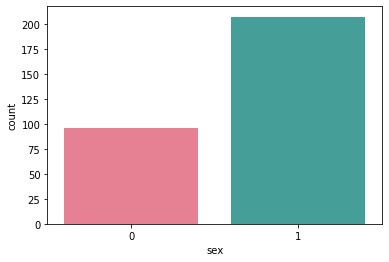

In [12]:
# plot number of male and female patients in data set
sns.countplot(x="sex", data=df, palette="husl")
plt.show()

In [13]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
Male = len(df[df.sex == 1])
Female = len(df[df.sex == 0])
print("Percentage of Patients Who are Male: {:.2f}%".format((Male / (len(df.sex))*100)))
print("Percentage of Patients Who are Female: {:.2f}%".format((Female / (len(df.sex))*100)))

Percentage of Patients Who are Male: 68.32%
Percentage of Patients Who are Female: 31.68%


### Sex to Heart Disease

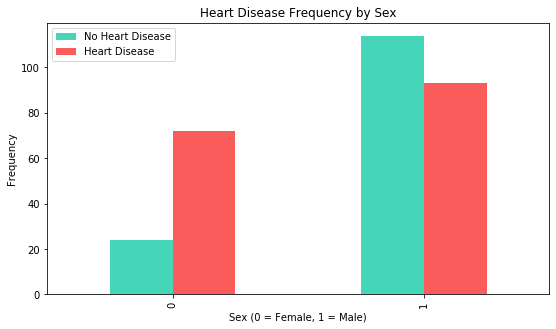

In [15]:
pd.crosstab(df.sex, df.target).plot(kind="bar",figsize=(9,5), color = ['#45d6b9', '#fa5c5c'])
plt.title('Heart Disease Frequency by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.legend(['No Heart Disease','Heart Disease'])
plt.show()

 - Overall, there are more women in the data set with heart disease than women without heart disease  
 - Overall, there are more men in the data set without heart disease than men with heart disease

### Age to Heart Disease

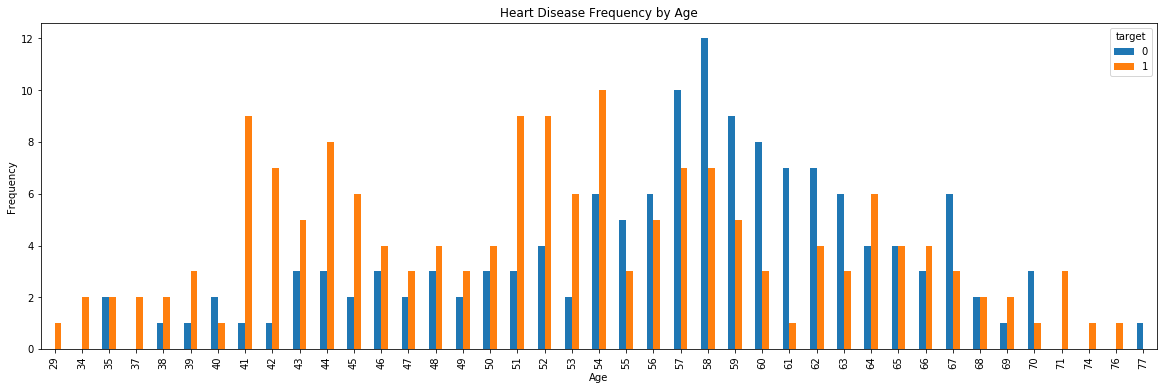

In [16]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

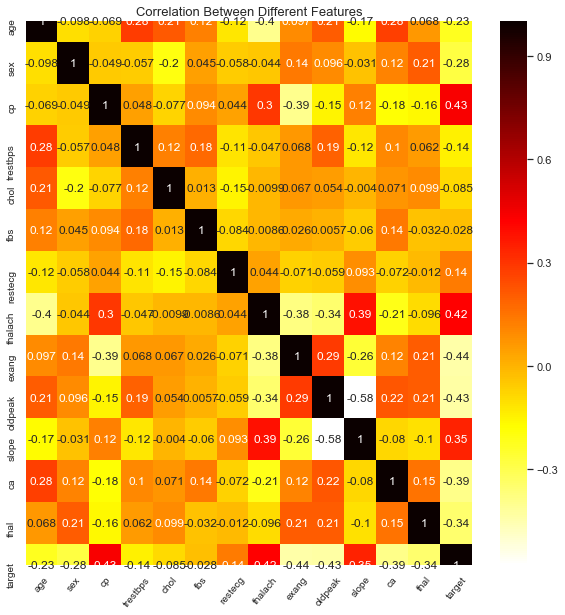

In [17]:
corrplot = df.corr()

plt.figure(figsize=(10,10))

sns.set(font_scale = 1)

heat_map = sns.heatmap(corrplot, cmap = 'hot_r',annot=True, yticklabels=df.columns, xticklabels=df.columns)

plt.xticks(fontsize=10,rotation=50)
plt.yticks(fontsize=10)
plt.title('Correlation Between Different Features', fontsize=13)
plt.show()

### Data Preprocessing (for deeper analysis)

In [18]:
X = df.drop(['target'], axis=1)
y = df['target']

### Random Forest Classifier to find the top features of Data Set

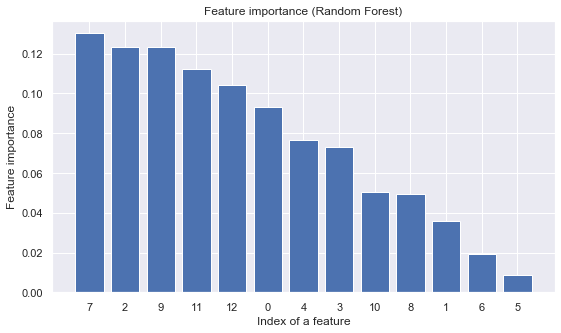

In [19]:
from sklearn.ensemble import RandomForestClassifier

sns.set_style('darkgrid')

forest_clf = RandomForestClassifier(n_estimators=100)
forest_clf.fit(X, y)

importances = forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(9,5))
plt.bar(range(len(indices)),importances[indices])
plt.xticks(range(len(indices)), indices)
plt.title("Feature importance (Random Forest)")
plt.xlabel('Index of a feature')
plt.ylabel('Feature importance')
plt.show()

### Top 5 features in Data Set:

In [20]:
top_features = X.iloc[:,indices[:5]].columns
print(top_features)

Index(['thalach', 'cp', 'oldpeak', 'ca', 'thal'], dtype='object')


**Top 5 features for predicting target label**:  
1. Chest pain (cp)
2. Maximum heart rate achieved (thalach)
3. ST depression induced by exercise relative to rest (oldpeak) 
4. Number of major vessels (0-3) colored by flourosopy (ca)
5. Thallium Stress Test (thal: 3 = normal; 6 = fixed defect; 7 = reversable defect) 

### Feature: Chest Pain (cp)

According to the Random Forest Classifier, the best feature for predicting whether or not a patient has heart disease is chest pain.  
  
Types of chest pains associated with this data set are:  
 - Value 1: Typical angina (0)
 - Value 2: Atypical angina (1)
 - Value 3: Non-anginal pain (2)
 - Value 4: Asymptomatic (3)

**Typical (classical) angina** chest pain consists of:  
1. Substernal chest pain or discomfort 
2. Provoked by exertion or emotional stress
3. Relieved by rest of nitroglycerine      
   
**Atypical angina** chest pain applies when 2 out of 3 criteria of typical angina are present. (2)  
  
**Non-angina** chest pain is used to describe pain the chest that is not caused by heart disease of heart attack.  (3)  
  
**Asymptomatic** chest pain does not exclude a patient from ischemic heart disease. Asymptomatic ischemia can be induced by physical or mental stress but may occur without any obvious trigger. (4)  
  
Sources:  
https://www.timeofcare.com/typical-vs-atypical-chest-pain/ (2)  
https://my.clevelandclinic.org/health/diseases/15851-gerd-non-cardiac-chest-pain (3)  
https://www.ahajournals.org/doi/full/10.1161/01.cir.0000033486.25339.ef (4)


In [21]:
# creating a new data frame for feature chest pain and target with a 'count' column
df_cp = df.groupby(["target","cp"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_cp = df_cp.sort_values("count", ascending = False).reset_index()

df_cp

index  target  cp  count
0      0       0   0    104
1      6       1   2     69
2      5       1   1     41
3      4       1   0     39
4      2       0   2     18
5      7       1   3     16
6      1       0   1      9
7      3       0   3      7

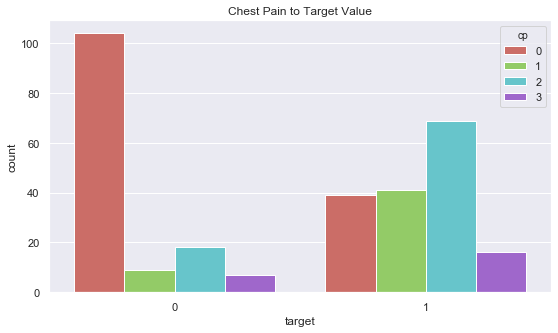

In [22]:
# bar plot for comparison with cp and target
plt.figure(figsize = (9,5))
sns.barplot(x = "target",y="count", 
            hue = "cp",
            data = df_cp,
            palette = 'hls')
sns.set(style='darkgrid')
plt.title("Chest Pain to Target Value")
plt.show()

 - Most patients in the data set without heart disease report typical angina (0) chest pain
 - The most common type of chest pain among patients with heart disease is non-angina (2) chest pain

### Feature: Maximum Heart Rate Achieved (thalach)

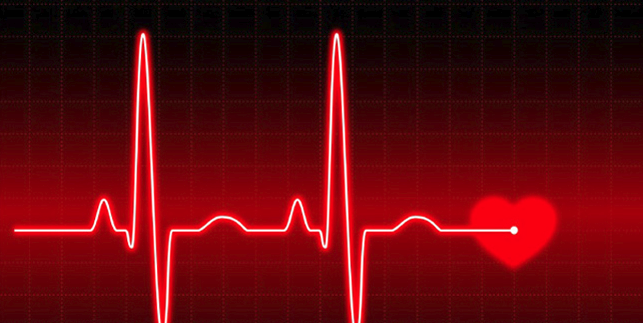

Image Source: https://hometale.org/wp-content/uploads/2018/11/best-heart-rate-monitor-reviews.jpg

In [23]:
print('The minimum and maximum heart rates in the data set are:')
print('Min Heart Rate:', df['thalach'].min(),',','Max Heart Rate:', df['thalach'].max())

The minimum and maximum heart rates in the data set are:
Min Heart Rate: 71 , Max Heart Rate: 202


A high resting heart rate consistently above 80 beats per minute may be an indication of heart disease. The rate at which your heart is beating when it is working its hardest to meet the oxygen needs of your body is your maximum heart rate.(5)  
  
Soruce: https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you (5)

#### Heart Disease in Relation to Heart Rate and Age

In [24]:
#import patsy
#import statsmodels.api as sm
#outcome, predictors = patsy.dmatrices('thalach ~ age', df)

#mod = sm.OLS(outcome, predictors)

## fit the model
#res = mod.fit()

## look at the results
#print(res.summary())

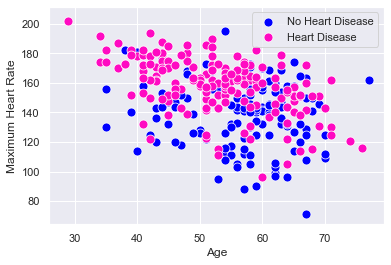

In [25]:
sns.scatterplot(x=df.age[df.target==0], y=df.thalach[(df.target==0)], alpha = 1, s =80,color = 'blue')
sns.scatterplot(x=df.age[df.target==1], y=df.thalach[(df.target==1)],alpha = 1, s=80,color = '#ff0ac2')

# this plots a prediction line for heart rate from age from OLS stats in above cell
#xs = np.arange(df['age'].min(), df['age'].max())
#ys = -1.0051 * xs + 204.2892
#plt.plot(xs, ys, '#1900ff', linewidth=4)

plt.legend(['No Heart Disease','Heart Disease'])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

- Maximum heart rate tends to decrease with age
- Heart rate tends to increase in the presence of heart disease

### Feature: ST depression induced by exercise relative to rest (oldpeak)

ST depression refers to a fining on an electrocardiogram, where the trace in the ST segment is abnormally low below the baseline. Exercise induced ST segment depression is condisdered a reliable ECG finding for the diagnosis of obtrusive coronoary atherosclerosis and associated with coronoary artery disease.(6)  
  
Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1768611/ (6)

In [26]:
# creating a new data frame for feature chest pain and target with a 'count' column
df_op = df.groupby(["target","oldpeak"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_op = df_op.sort_values("oldpeak", ascending = False).reset_index()

df_op

index  target  oldpeak  count
0      34       0      6.2      1
1      33       0      5.6      1
2      32       0      4.4      1
3      60       1      4.2      1
4      31       0      4.2      1
..    ...     ...      ...    ...
56      2       0      0.2      3
57     36       1      0.1      4
58      1       0      0.1      3
59     35       1      0.0     74
60      0       0      0.0     25

[61 rows x 4 columns]

#### ST Depression Distribution and Heart Disease

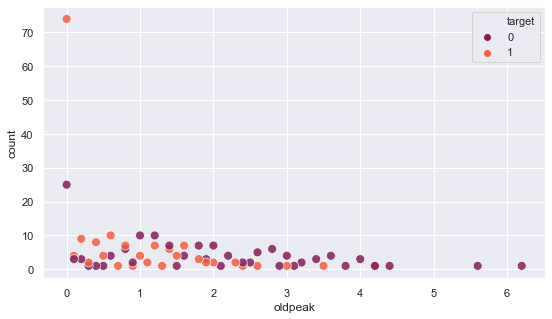

In [27]:
plt.figure(figsize = (9,5))
sns.scatterplot(x='oldpeak', y='count', hue = 'target', 
                data = df_op, alpha=0.85, s= 80, 
                palette = 'rocket')
plt.xlabel("oldpeak")
plt.ylabel("count")
plt.show()

- ST Depression value of 0 has more patients with heart disease than patients without heart disease

### Feature: Major Vessels (0-3) Colored by Fluoroscopy (ca)

Fluoroscopy is an imaging technique that uses X-rays to obtain moving images in real-time of the interior of an object, think X-ray movie. It can be used to evaluate specific areas of the body, such as heart vessels.  
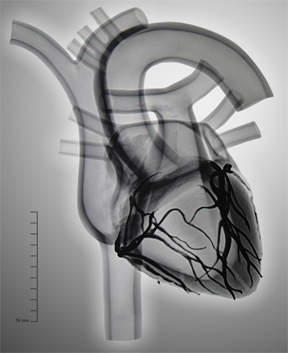 
Source: https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=92&contentid=P07662 (7)  
Image Source: https://www.thecgroup.com/wp-content/uploads/2015/11/1396-C-84-Fluoroscopic-Heart.jpg 

In [28]:
# creating a new data frame for feature vessels and target with a 'count' column
df_ca = df.groupby(["target","ca"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_ca = df_ca.sort_values("count", ascending = False).reset_index()

df_ca

index  target  ca  count
0      5       1   0    130
1      0       0   0     45
2      1       0   1     44
3      2       0   2     31
4      6       1   1     21
5      3       0   3     17
6      7       1   2      7
7      9       1   4      4
8      8       1   3      3
9      4       0   4      1

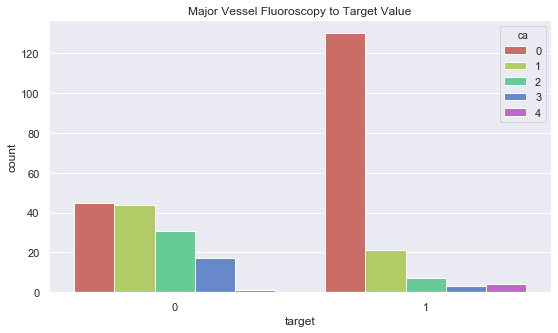

In [29]:
# bar plot for comparison with vessels and target
plt.figure(figsize = (9,5))
sns.barplot(x = "target",y="count", 
            hue = "ca",
            data = df_ca,
            palette = 'hls')
sns.set(style='darkgrid')
plt.title("Major Vessel Fluoroscopy to Target Value")
plt.show()

 - Major vessel 0 is most associated with heart disease

### Feature: Thallium Stress Test (thal)

A thallium stress test is a nuclear imaging test that shows how well blood flows into your heart during exercise or at rest. The test is also referred to as cardiac or nuclear stress test. The procedure involves the administration of a liquid with small amounts of a radioactive isotope called radioisotope into one of the veins. The radioisotope flows through the bloodstream and enters in the heart. Once in the heart, a special gamma camera can detect the radiation and reveal any issues the heart muscle may be experiencing.  
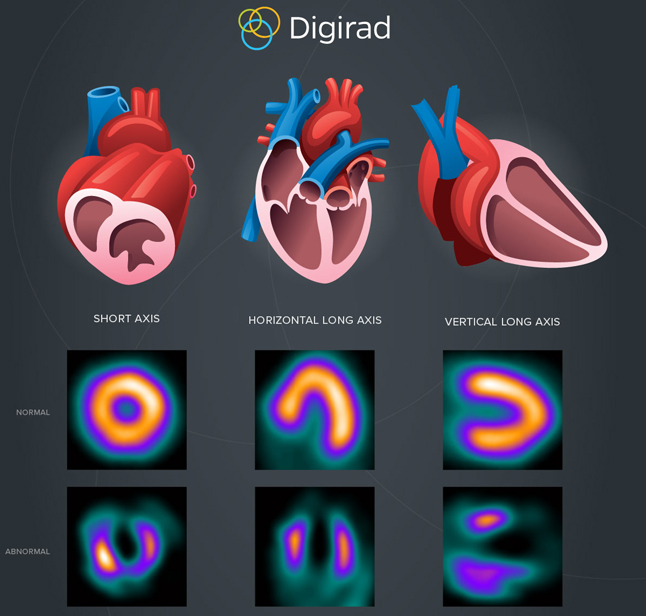
Source: https://www.healthline.com/health/thallium-stress-test  
Image Source: https://www.digirad.com/wp-content/uploads/2018/06/understanding-nuclear-medicine-stress-test.jpg!

 (thal: 3 = normal; 6 = fixed defect; 7 = reversable defect) 

The data source provided thal values mapping to: 3 = normal; 6 = fixed defect; 7 = reversable defect; however this was actually not the case. Actual values for thallium stress test (thal) in the data set are:  
 - 0: null 
 - 1: fixed defect
 - 2: normal
 - 3: reversable defect

In [30]:
# creating a new data frame for feature thal and target with a 'count' column
df_thal = df.groupby(["target","thal"]).size().reset_index(name = "count")

# reordering data frame by count from highest to lowest
df_thal = df_thal.sort_values("count", ascending = False).reset_index()

df_thal

index  target  thal  count
0      6       1     2    130
1      3       0     3     89
2      2       0     2     36
3      7       1     3     28
4      1       0     1     12
5      5       1     1      6
6      0       0     0      1
7      4       1     0      1

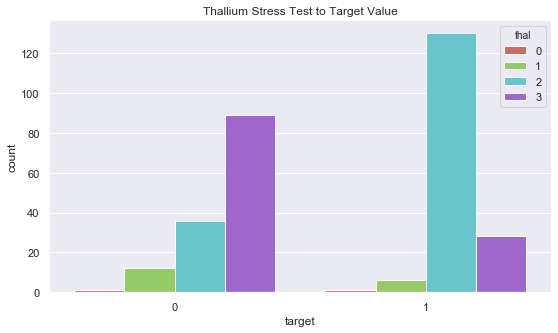

In [31]:
# bar plot for comparison with cp and target
plt.figure(figsize = (9,5))
sns.barplot(x = "target",y="count", 
            hue = "thal",
            data = df_thal,
            palette = 'hls')
sns.set(style='darkgrid')
plt.title("Thallium Stress Test to Target Value")
plt.show()

 - Normal thallium stress test results are most associated with heart disease
 - Reversable defect thallium stress test results are most associated with no heart disease

# Model Implementation

### Import Grid + Helper Functions

In [32]:
from HD_acc import *
from HD_prec import *
from plot_learning_curve import *

# Trial 1

## Setup 

In [33]:
# To store results of models in trial 1
t1_accu_dict = {}

t1_train_dict = {}
t1_test_dict = {}

t1_optimal_train_dict = {}
t1_optimal_test_dict = {}

In [34]:
from sklearn.model_selection import train_test_split
# train, test split
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size=0.2, random_state = 21)

standardscale = StandardScaler()
X1_train = standardscale.fit_transform(X1_train)
X1_test = standardscale.transform(X1_test)
y1_train  = y1_train.to_numpy()
y1_test = y1_test.to_numpy()
print("Shape of input data X_train: {} and shape of target variable y_train: {}".format(X1_train.shape, y1_train.shape))
print("Shape of input data X_test: {} and shape of target variable y_test: {}".format(X1_test.shape, y1_test.shape))

Shape of input data X_train: (242, 13) and shape of target variable y_train: (242,)
Shape of input data X_test: (61, 13) and shape of target variable y_test: (61,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [35]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X1_train, y1_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 87.50% | outer ACC 67.35%
outer fold 1/5 | tuning KNN      | inner ACC 81.64% | outer ACC 87.76%
outer fold 1/5 | tuning Logistic | inner ACC 81.26% | outer ACC 77.55%
outer fold 1/5 | tuning RandomForest | inner ACC 84.33% | outer ACC 79.59%
outer fold 2/5 | tuning DecisionTree | inner ACC 81.86% | outer ACC 79.59%
outer fold 2/5 | tuning KNN      | inner ACC 82.64% | outer ACC 81.63%
outer fold 2/5 | tuning Logistic | inner ACC 81.24% | outer ACC 83.67%
outer fold 2/5 | tuning RandomForest | inner ACC 83.67% | outer ACC 83.67%
outer fold 3/5 | tuning DecisionTree | inner ACC 79.81% | outer ACC 77.08%
outer fold 3/5 | tuning KNN      | inner ACC 81.21% | outer ACC 85.42%
outer fold 3/5 | tuning Logistic | inner ACC 79.30% | outer ACC 89.58%
outer fold 3/5 | tuning RandomForest | inner ACC 79.69% | outer ACC 89.58%
outer fold 4/5 | tuning DecisionTree | inner ACC 83.17% | outer ACC 77.08%
outer fold 4/5 | tuning KNN      | inner ACC 86.8

Accuracy 84.32% (average over CV test folds)
Training Accuracy: 100.00%
Test Accuracy: 78.69%
Wall time: 14.8 s


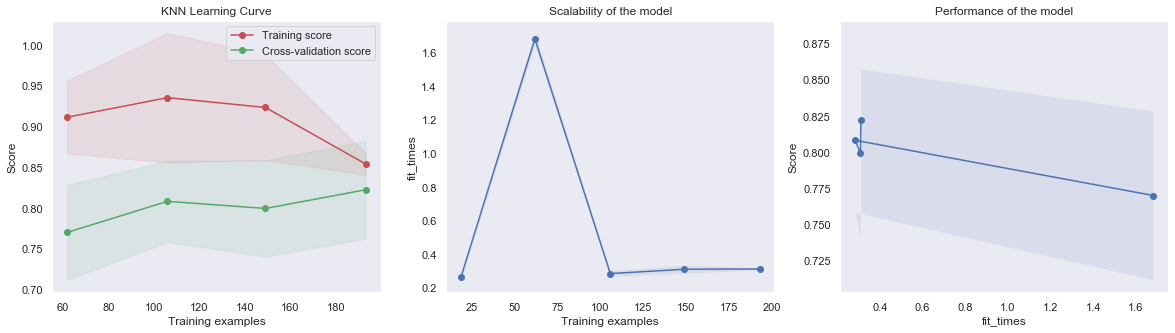

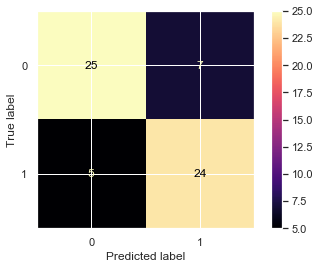

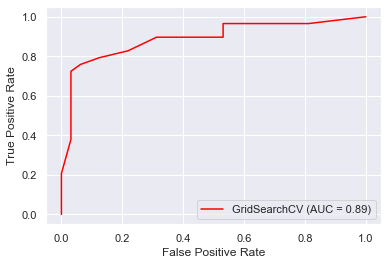

In [36]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t1_algo('KNN'), 'KNN', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'KNN Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X1_test, y1_test, c ='red');

Accuracy 83.90% (average over CV test folds)
Training Accuracy: 100.00%
Test Accuracy: 80.33%
Wall time: 5min 19s


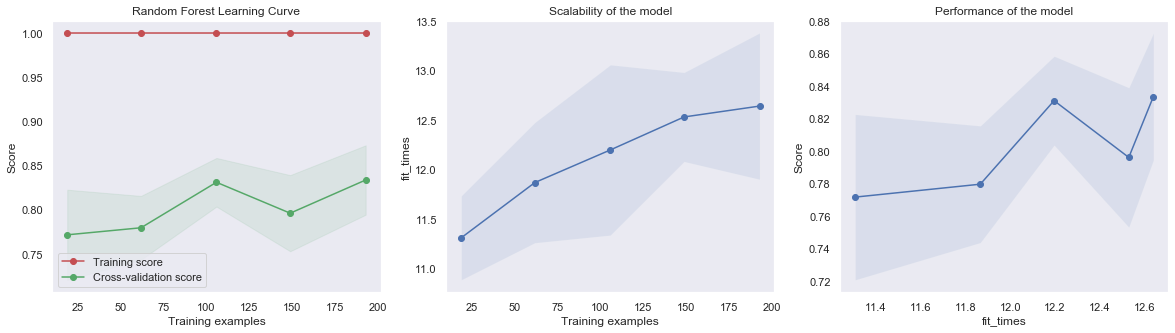

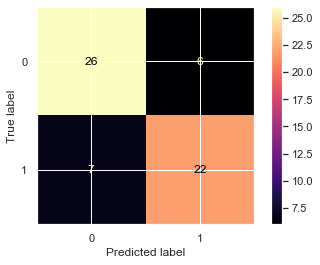

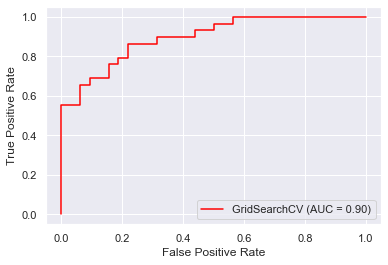

In [37]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t1_algo('RandomForest'), 'RandomForest', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'RandomForest Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X1_test, y1_test, c ='red');

Accuracy 83.08% (average over CV test folds)
Training Accuracy: 83.47%
Test Accuracy: 80.33%
Wall time: 9.05 s


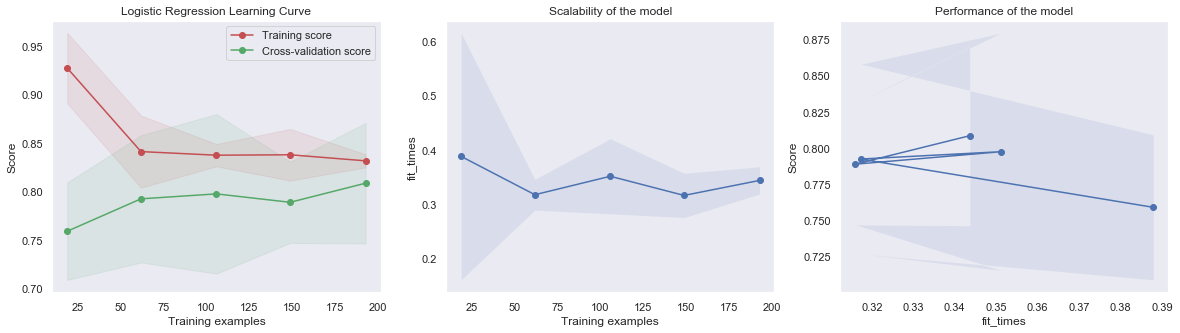

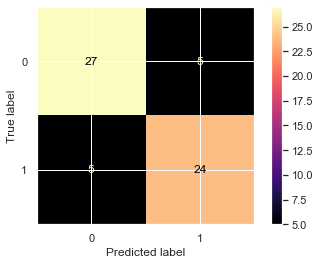

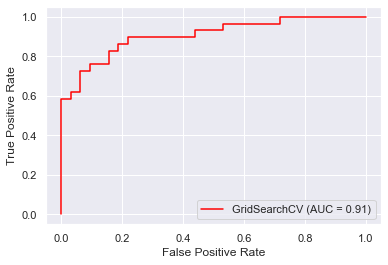

In [38]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t1_algo('Logistic'), 'Logistic', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Logistic Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X1_test, y1_test, c ='red');

Accuracy 79.37% (average over CV test folds)
Training Accuracy: 85.95%
Test Accuracy: 77.05%
Wall time: 6.73 s


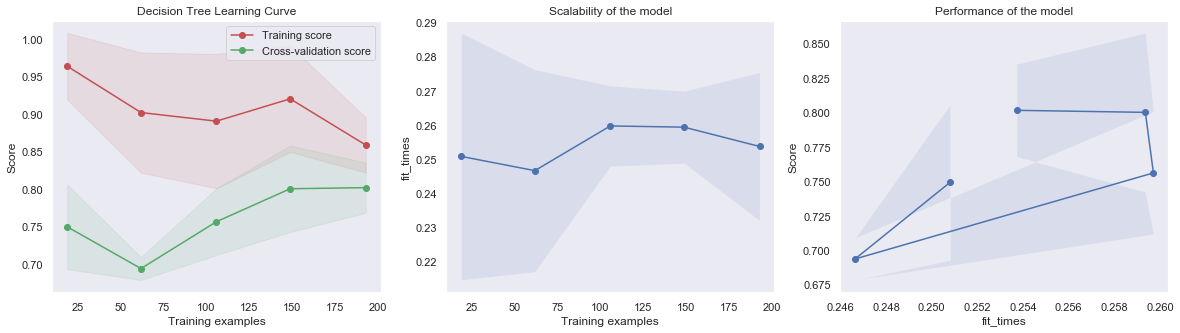

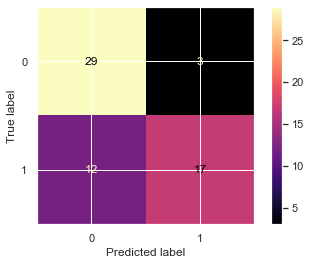

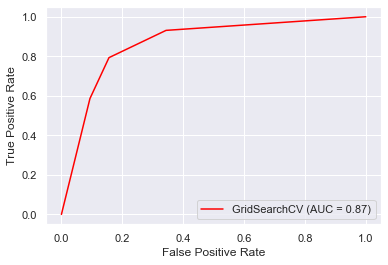

In [39]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t1_algo('DecisionTree'), 'DecisionTree', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'DecisionTree Accuracy', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X1_test, y1_test, c ='red');

In [40]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('uniform', 20, 8, 0.1, 2, 'l2', X1_train, y1_train, X1_test, y1_test,t1_optimal_train_dict,t1_optimal_test_dict)

KNN Train Accuracy 0.8267006802721089
KNN Test Accuracy 0.7868852459016393
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.77      0.79      0.78        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Random Forest Train Accuracy 0.8183673469387756
Random Forest Test Accuracy 0.819672131147541
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.85      0.76      0.80        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Logistic Train Accuracy 0.8308673469387754
Logistic Test Accuracy 0.8032786885245902
              precision    recall  f1-score   support

           0       0.79      0.84    

## Precision Performance

### Model 'refit' set to precision

In [41]:
train_algo_prec(gridcvs, X1_train, y1_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 87.50% | outer prec 76.19%
outer fold 1/5 | tuning KNN      | inner prec 81.64% | outer prec 88.89%
outer fold 1/5 | tuning Logistic | inner prec 81.26% | outer prec 76.67%
outer fold 1/5 | tuning RandomForest | inner prec 84.47% | outer prec 82.14%
outer fold 2/5 | tuning DecisionTree | inner prec 81.86% | outer prec 84.62%
outer fold 2/5 | tuning KNN      | inner prec 82.64% | outer prec 82.76%
outer fold 2/5 | tuning Logistic | inner prec 81.24% | outer prec 83.33%
outer fold 2/5 | tuning RandomForest | inner prec 84.05% | outer prec 86.21%
outer fold 3/5 | tuning DecisionTree | inner prec 80.45% | outer prec 90.00%
outer fold 3/5 | tuning KNN      | inner prec 81.21% | outer prec 88.46%
outer fold 3/5 | tuning Logistic | inner prec 79.30% | outer prec 89.29%
outer fold 3/5 | tuning RandomForest | inner prec 78.50% | outer prec 92.59%
outer fold 4/5 | tuning DecisionTree | inner prec 83.32% | outer prec 79.31%
outer fold 4/5 | tuning

Precision 84.32% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 75.00%
Wall time: 15.6 s


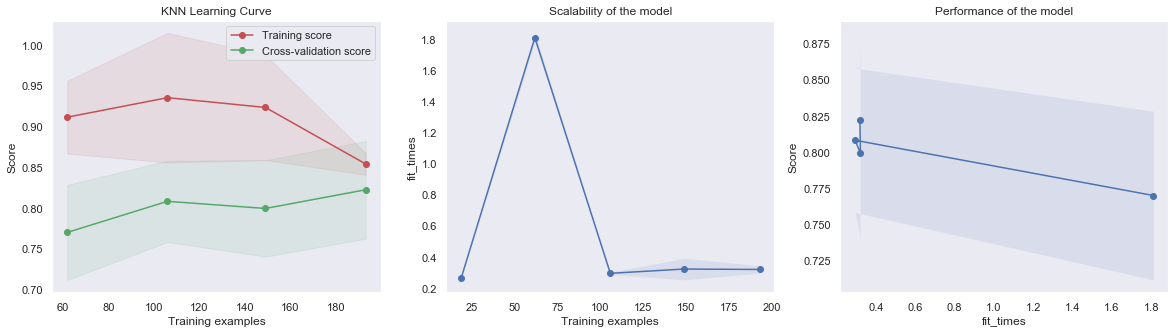

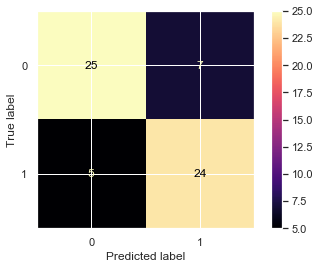

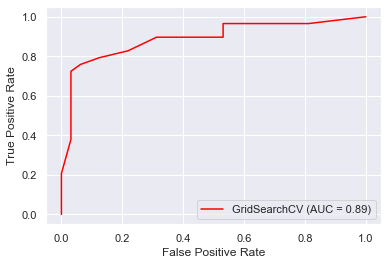

In [42]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('KNN'), 'KNN', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'KNN Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X1_test, y1_test, c ='red');

Precision 84.31% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 81.48%
Wall time: 5min 31s


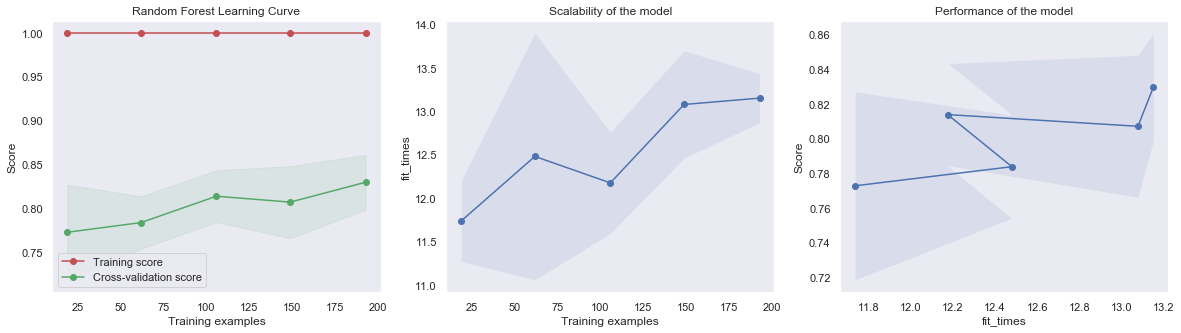

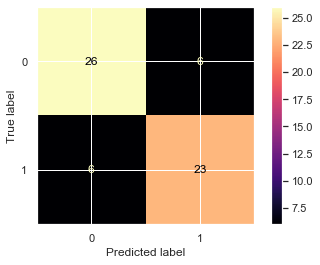

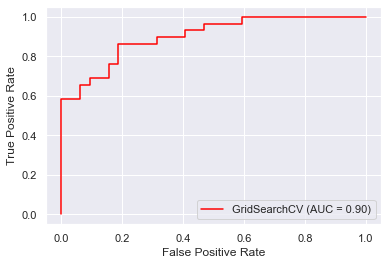

In [43]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('RandomForest'), 'RandomForest', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Random Forest Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X1_test, y1_test, c ='red');

Precision 83.08% (average over CV test folds)
Training Precision: 79.27%
Test Precision: 79.31%
Wall time: 8.47 s


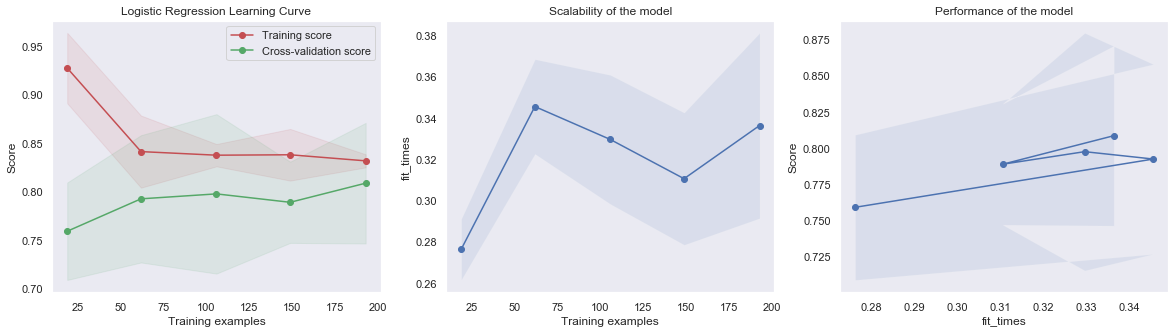

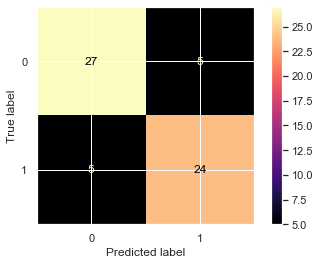

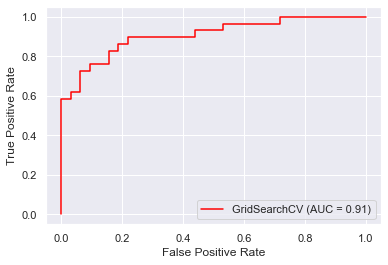

In [44]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('Logistic'), 'Logistic', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Logistic Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X1_test, y1_test, c ='red');

Precision 79.37% (average over CV test folds)
Training Precision: 84.00%
Test Precision: 75.86%
Wall time: 6.43 s


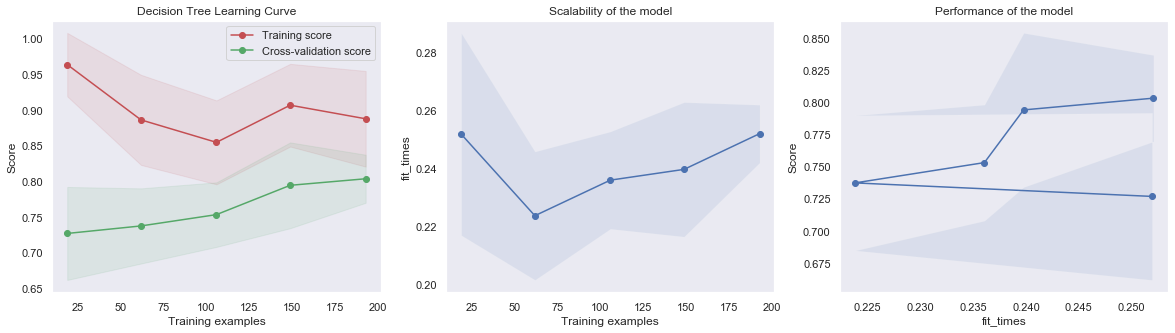

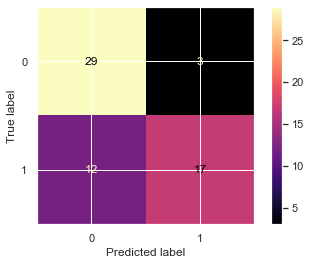

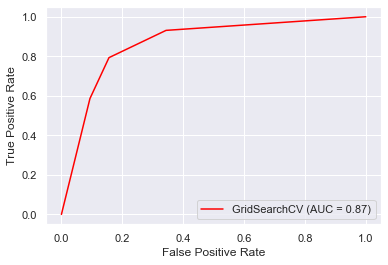

In [45]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X1_train, y1_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t1_algo('DecisionTree'), 'DecisionTree', X1_train, y1_train, X1_test, y1_test, t1_accu_dict,'Decision Tree Precision', t1_train_dict, t1_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X1_test, y1_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X1_test, y1_test, c ='red');

In [46]:
optimized_prec('uniform', 20, 6, 0.1, 2, 'l2', X1_train, y1_train, X1_test, y1_test,t1_optimal_train_dict,t1_optimal_test_dict)

KNN Train Precision 0.8246753246753247
KNN Test Precision 0.7666666666666667
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.77      0.79      0.78        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

Random Forest Train Precision 1.0
Random Forest Test Precision 0.8461538461538461
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        32
           1       0.85      0.76      0.80        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Logistic Train Precision 0.8129032258064516
Logistic Test Precision 0.8148148148148148
              precision    recall  f1-score   support

           0       0.79      0.84      0.82  

# Results: Trial 1

In [47]:
t1_df_accu_dict = pd.DataFrame.from_dict(t1_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_train_dict = pd.DataFrame.from_dict(t1_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_test_dict = pd.DataFrame.from_dict(t1_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_optimal_train_dict = pd.DataFrame.from_dict(t1_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t1_df_optimal_test_dict = pd.DataFrame.from_dict(t1_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [48]:
print("Average Accuracy Across Folds")
print(t1_df_accu_dict)
print("")
print("Training Metric Scores")
print(t1_df_train_dict)
print("")
print("Testing Metric Scores")
print(t1_df_test_dict)
print("")
print("Training Metric Scores For Optimal Parameter")
print(t1_df_optimal_train_dict)
print("")
print("Testing Metric Scores For Optimal Parameter")
print(t1_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
KNN Accuracy             0.843197
KNN Precision            0.843197
Random Forest Precision  0.843112
RandomForest Accuracy    0.839031
Logistic Accuracy        0.830782
Logistic Precision       0.830782
DecisionTree Accuracy    0.793707
Decision Tree Precision  0.793707

Training Metric Scores
                                   Score
KNN Training Accuracy           1.000000
RandomForest Training Accuracy  1.000000
KNN Train Precision             1.000000
RandomForest Train Precision    1.000000
DecisionTree Training Accuracy  0.859504
DecisionTree Train Precision    0.840000
Logistic Training Accuracy      0.834711
Logistic Train Precision        0.792683

Testing Metric Scores
                                Score
RandomForest Test Precision  0.814815
RandomForest Test Accuracy   0.803279
Logistic Test Accuracy       0.803279
Logistic Test Precision      0.793103
KNN Test Accuracy            0.786885
DecisionTree Test Ac

## Visualizations

### Average Accuracies Across Folds

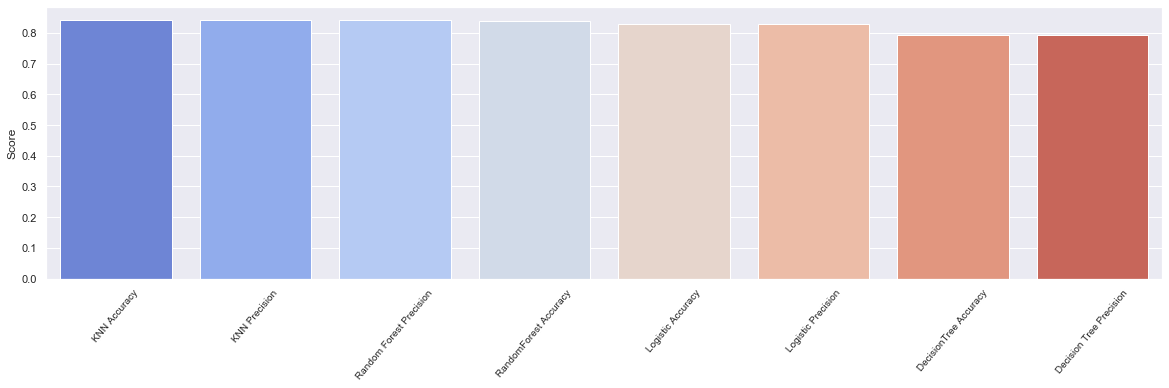

In [49]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_accu_dict.index,y = t1_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics

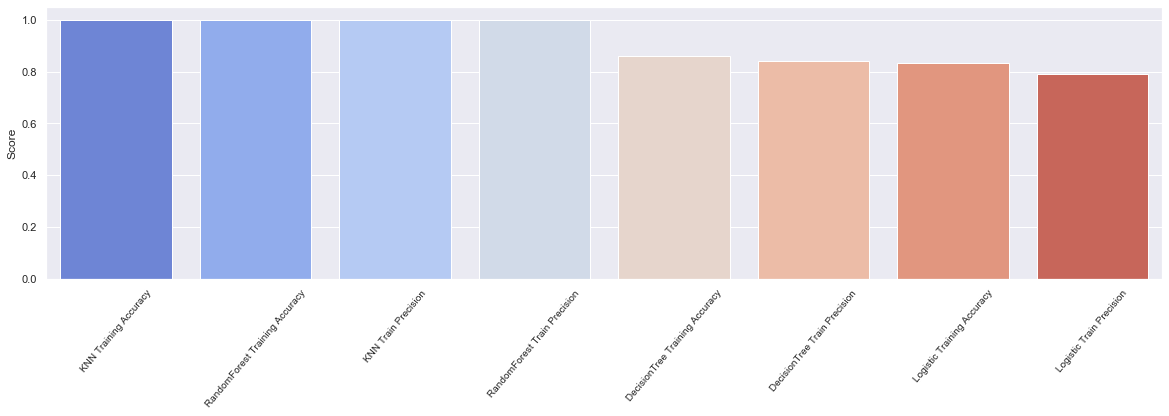

In [50]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_train_dict.index,y = t1_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics

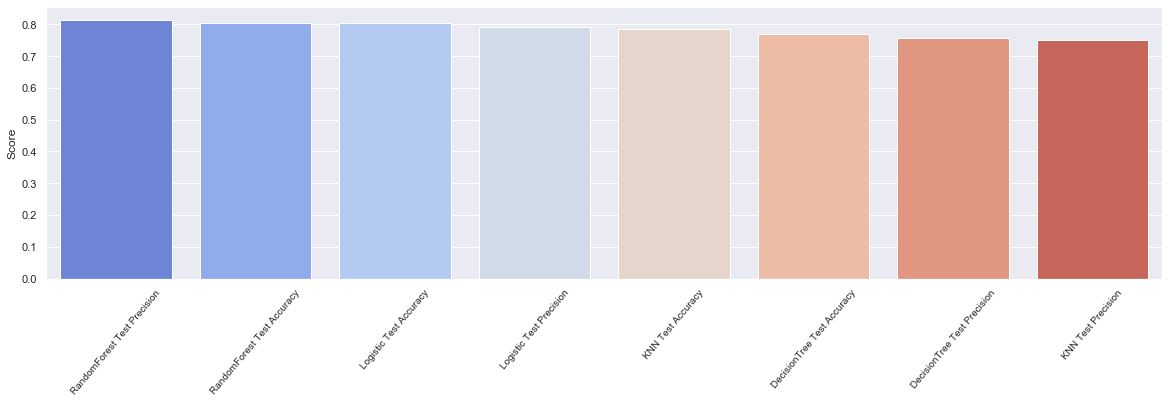

In [51]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_test_dict.index,y = t1_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics With Optimal Hyperparameter

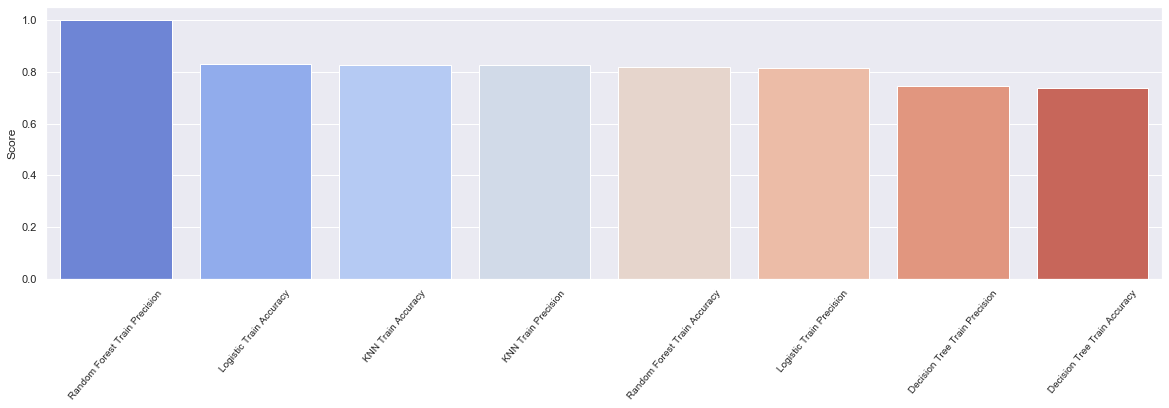

In [52]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_optimal_train_dict.index,y = t1_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics With Optimal Hyperparameter

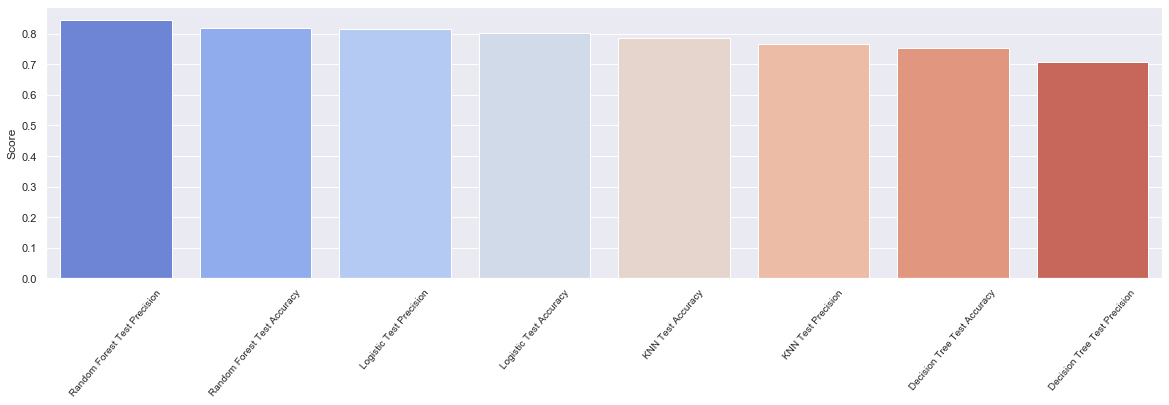

In [53]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t1_df_optimal_test_dict.index,y = t1_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t1_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

## Trial 2

In [54]:
# To store results of models in trial 1
t2_accu_dict = {}

t2_train_dict = {}
t2_test_dict = {}

t2_optimal_train_dict = {}
t2_optimal_test_dict = {}

In [55]:
from sklearn.model_selection import train_test_split
# train, test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X,y, test_size=0.2, random_state = 8675)

standardscale = StandardScaler()
X2_train = standardscale.fit_transform(X2_train)
X2_test = standardscale.transform(X2_test)
y2_train  = y2_train.to_numpy()
y2_test = y2_test.to_numpy()
print("Shape of input data X_train: {} and shape of target variable y_train: {}".format(X2_train.shape, y2_train.shape))
print("Shape of input data X_test: {} and shape of target variable y_test: {}".format(X2_test.shape, y2_test.shape))

Shape of input data X_train: (242, 13) and shape of target variable y_train: (242,)
Shape of input data X_test: (61, 13) and shape of target variable y_test: (61,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [56]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X2_train, y2_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 86.93% | outer ACC 77.55%
outer fold 1/5 | tuning KNN      | inner ACC 83.93% | outer ACC 81.63%
outer fold 1/5 | tuning Logistic | inner ACC 81.57% | outer ACC 83.67%
outer fold 1/5 | tuning RandomForest | inner ACC 85.88% | outer ACC 77.55%
outer fold 2/5 | tuning DecisionTree | inner ACC 80.36% | outer ACC 71.43%
outer fold 2/5 | tuning KNN      | inner ACC 82.76% | outer ACC 83.67%
outer fold 2/5 | tuning Logistic | inner ACC 80.82% | outer ACC 83.67%
outer fold 2/5 | tuning RandomForest | inner ACC 83.50% | outer ACC 83.67%
outer fold 3/5 | tuning DecisionTree | inner ACC 79.95% | outer ACC 81.25%
outer fold 3/5 | tuning KNN      | inner ACC 82.38% | outer ACC 89.58%
outer fold 3/5 | tuning Logistic | inner ACC 78.35% | outer ACC 85.42%
outer fold 3/5 | tuning RandomForest | inner ACC 82.86% | outer ACC 89.58%
outer fold 4/5 | tuning DecisionTree | inner ACC 82.75% | outer ACC 81.25%
outer fold 4/5 | tuning KNN      | inner ACC 81.0

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Accuracy 84.72% (average over CV test folds)
Training Accuracy: 100.00%
Test Accuracy: 77.05%
Wall time: 14.9 s


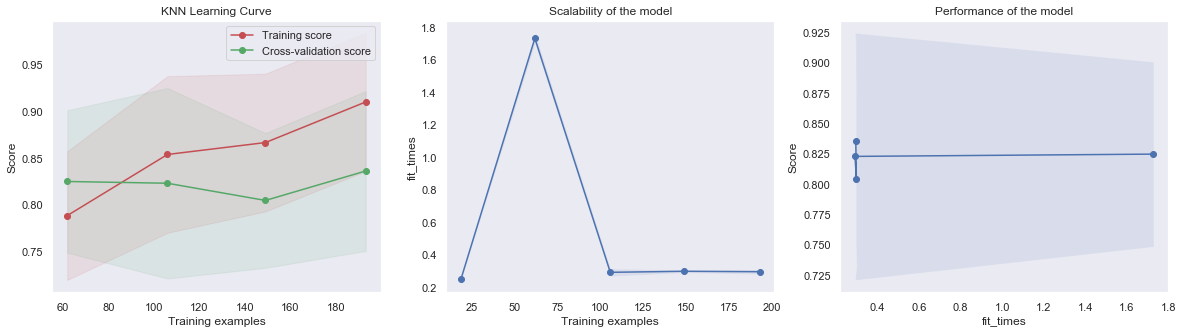

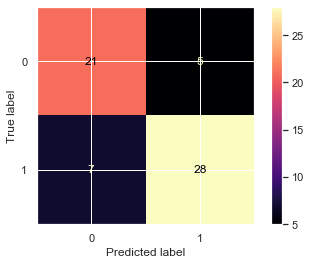

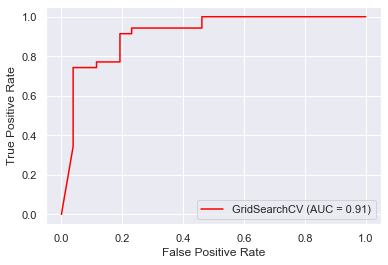

In [57]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t2_algo('KNN'), 'KNN', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'KNN Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X2_test, y2_test, c ='red');

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Accuracy 84.71% (average over CV test folds)
Training Accuracy: 100.00%
Test Accuracy: 75.41%
Wall time: 5min 37s


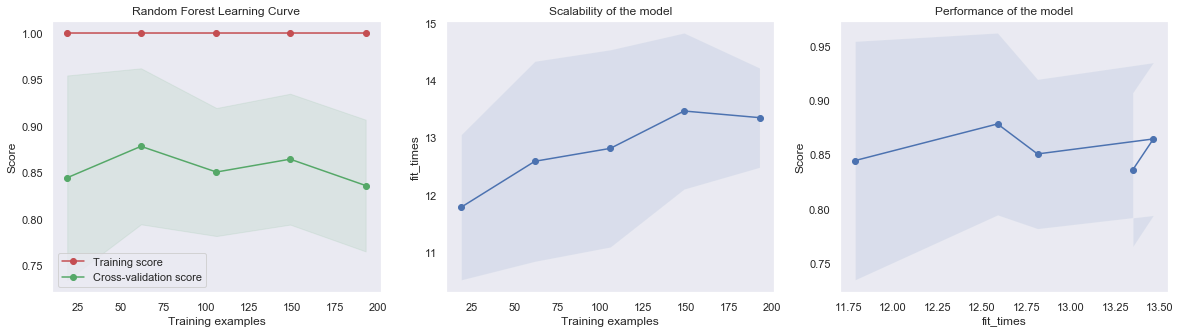

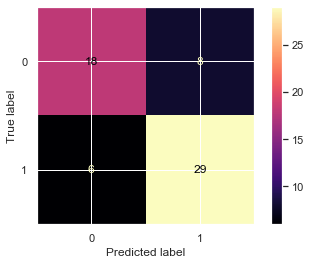

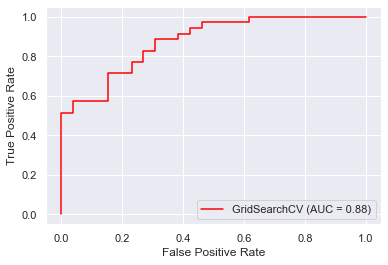

In [58]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t2_algo('RandomForest'), 'RandomForest', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'RandomForest Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X2_test, y2_test, c ='red');

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Accuracy 83.08% (average over CV test folds)
Training Accuracy: 84.30%
Test Accuracy: 81.97%
Wall time: 8.51 s


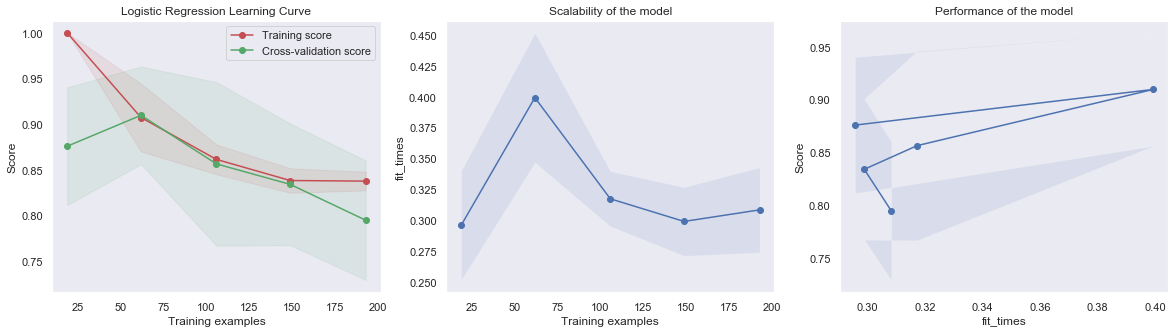

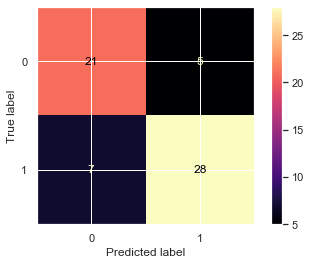

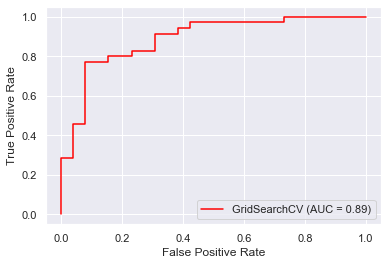

In [59]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t2_algo('Logistic'), 'Logistic', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Logistic Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X2_test, y2_test, c ='red');

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Accuracy 82.21% (average over CV test folds)
Training Accuracy: 86.78%
Test Accuracy: 72.13%
Wall time: 6.56 s


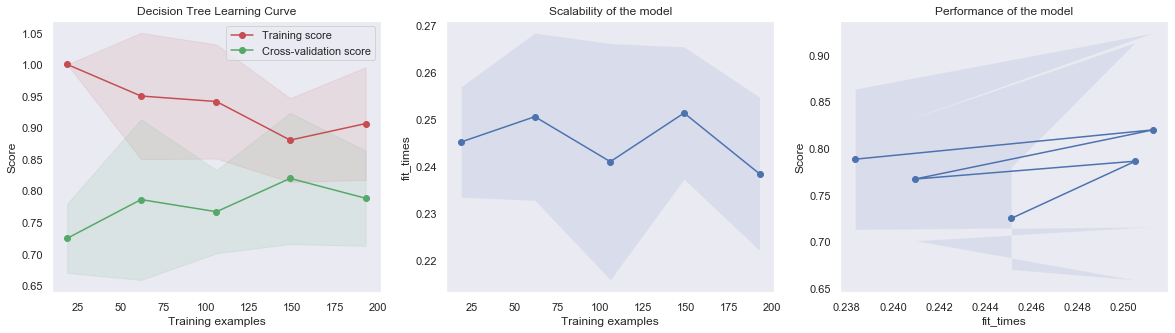

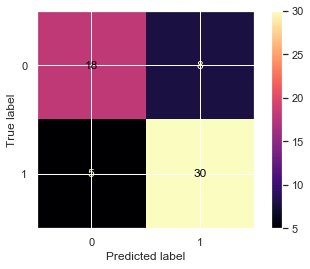

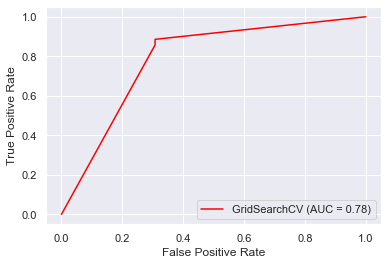

In [60]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t2_algo('DecisionTree'), 'DecisionTree', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'DecisionTree Accuracy', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X2_test, y2_test, c ='red');

In [61]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('distance', 10, 6, 1, 6, 'l2', X2_train, y2_train, X2_test, y2_test,t2_optimal_train_dict,t2_optimal_test_dict)

KNN Train Accuracy 0.8263605442176871
KNN Test Accuracy 0.819672131147541
              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.85      0.83      0.84        35

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Random Forest Train Accuracy 0.8305272108843538
Random Forest Test Accuracy 0.7540983606557377
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.78      0.80      0.79        35

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Logistic Train Accuracy 0.8056122448979591
Logistic Test Accuracy 0.7868852459016393
              precision    recall  f1-score   support

           0       0.76      0.73    

## Precision Performance

### Model 'refit' set to precision

In [62]:
train_algo_prec(gridcvs, X2_train, y2_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 85.64% | outer prec 79.31%
outer fold 1/5 | tuning KNN      | inner prec 83.93% | outer prec 79.31%
outer fold 1/5 | tuning Logistic | inner prec 81.57% | outer prec 80.00%
outer fold 1/5 | tuning RandomForest | inner prec 86.80% | outer prec 80.00%
outer fold 2/5 | tuning DecisionTree | inner prec 80.36% | outer prec 77.27%
outer fold 2/5 | tuning KNN      | inner prec 82.76% | outer prec 80.00%
outer fold 2/5 | tuning Logistic | inner prec 80.82% | outer prec 84.62%
outer fold 2/5 | tuning RandomForest | inner prec 84.45% | outer prec 85.71%
outer fold 3/5 | tuning DecisionTree | inner prec 79.69% | outer prec 85.71%
outer fold 3/5 | tuning KNN      | inner prec 82.38% | outer prec 95.65%
outer fold 3/5 | tuning Logistic | inner prec 78.35% | outer prec 78.79%
outer fold 3/5 | tuning RandomForest | inner prec 82.94% | outer prec 88.89%
outer fold 4/5 | tuning DecisionTree | inner prec 83.52% | outer prec 77.42%
outer fold 4/5 | tuning

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Precision 84.72% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 80.00%
Wall time: 14.6 s


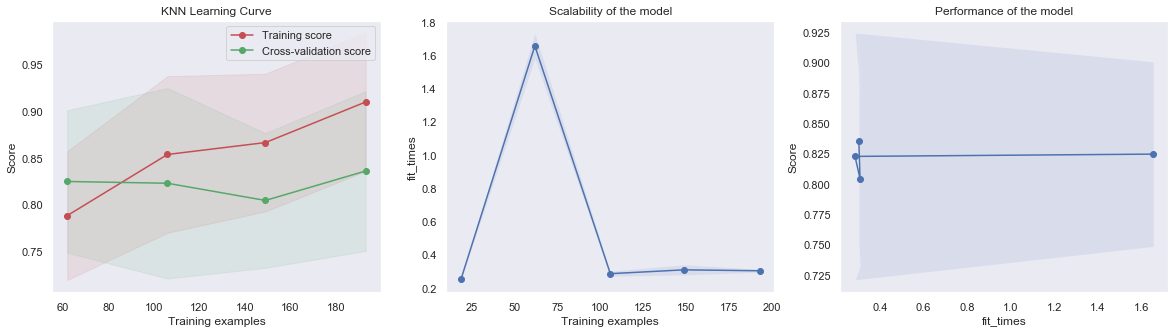

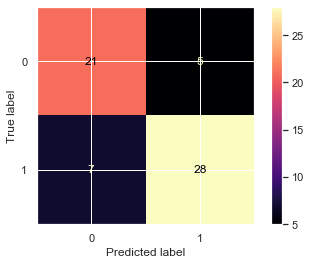

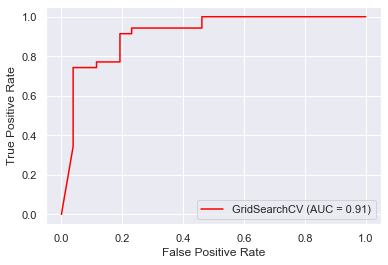

In [63]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('KNN'), 'KNN', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'KNN Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X2_test, y2_test, c ='red');

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Precision 84.70% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 78.38%
Wall time: 5min 7s


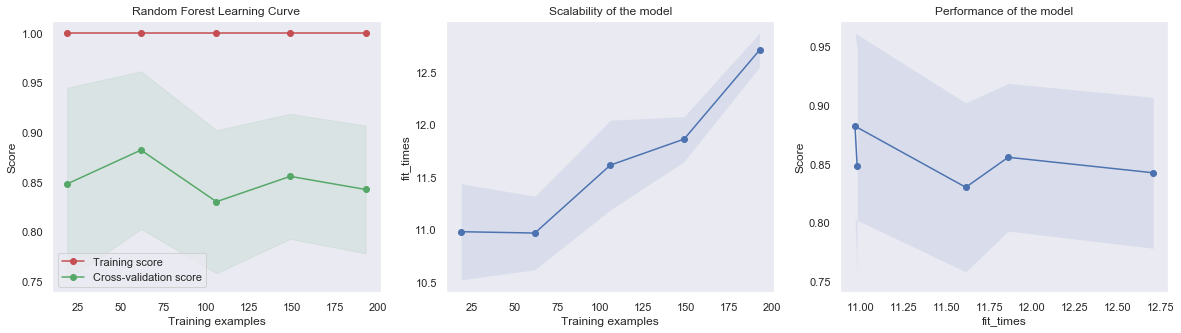

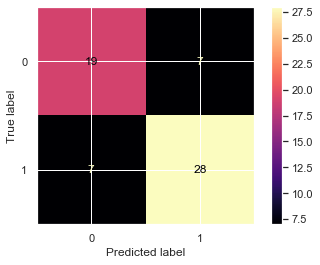

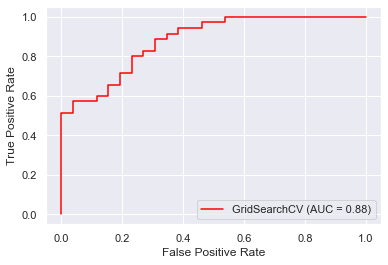

In [64]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('RandomForest'), 'RandomForest', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Random Forest Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X2_test, y2_test, c ='red');

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Precision 83.08% (average over CV test folds)
Training Precision: 80.26%
Test Precision: 81.58%
Wall time: 8.8 s


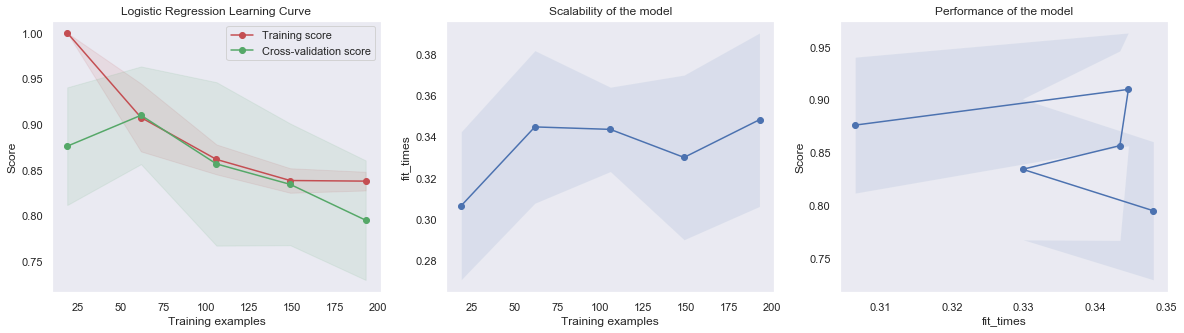

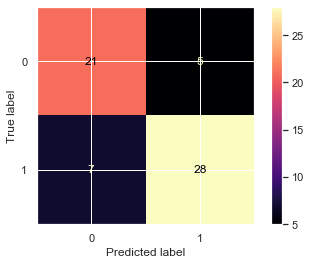

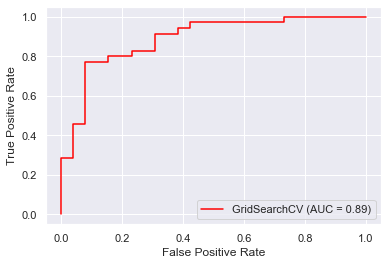

In [65]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('Logistic'), 'Logistic', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Logistic Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X2_test, y2_test, c ='red');

C:\Users\Dillon\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.



Precision 82.21% (average over CV test folds)
Training Precision: 83.56%
Test Precision: 74.36%
Wall time: 6.61 s


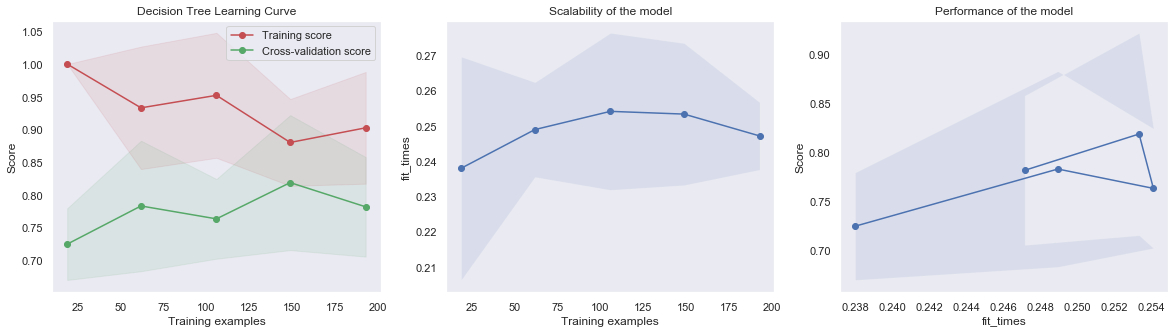

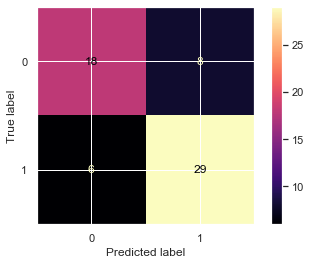

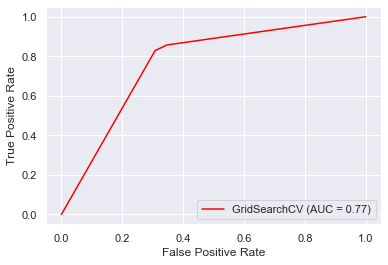

In [66]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X2_train, y2_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t2_algo('DecisionTree'), 'DecisionTree', X2_train, y2_train, X2_test, y2_test, t2_accu_dict,'Decision Tree Precision', t2_train_dict, t2_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X2_test, y2_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X2_test, y2_test, c ='red');

In [67]:
optimized_prec('uniform', 10, 6, 1, 6, 'l2', X2_train, y2_train, X2_test, y2_test,t2_optimal_train_dict,t2_optimal_test_dict)

KNN Train Precision 0.8721804511278195
KNN Test Precision 0.875
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.88      0.80      0.84        35

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

Random Forest Train Precision 1.0
Random Forest Test Precision 0.7777777777777778
              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.78      0.80      0.79        35

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Logistic Train Precision 0.8402777777777778
Logistic Test Precision 0.8055555555555556
              precision    recall  f1-score   support

           0       0.76      0.73      0.75        26
    

## Results: Trial 2

In [68]:
t2_df_accu_dict = pd.DataFrame.from_dict(t2_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_train_dict = pd.DataFrame.from_dict(t2_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_test_dict = pd.DataFrame.from_dict(t2_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_optimal_train_dict = pd.DataFrame.from_dict(t2_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t2_df_optimal_test_dict = pd.DataFrame.from_dict(t2_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [69]:
print("Average Accuracy Across Folds")
print(t2_df_accu_dict)
print("")
print("Training Metric Scores")
print(t2_df_train_dict)
print("")
print("Testing Metric Scores")
print(t2_df_test_dict)
print("")
print("Training Metric Scores For Optimal Parameter")
print(t2_df_optimal_train_dict)
print("")
print("Testing Metric Scores For Optimal Parameter")
print(t2_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
KNN Accuracy             0.847194
KNN Precision            0.847194
RandomForest Accuracy    0.847109
Random Forest Precision  0.847024
Logistic Accuracy        0.830782
Logistic Precision       0.830782
DecisionTree Accuracy    0.822109
Decision Tree Precision  0.822109

Training Metric Scores
                                   Score
KNN Training Accuracy           1.000000
RandomForest Training Accuracy  1.000000
KNN Train Precision             1.000000
RandomForest Train Precision    1.000000
DecisionTree Training Accuracy  0.867769
Logistic Training Accuracy      0.842975
DecisionTree Train Precision    0.835616
Logistic Train Precision        0.802632

Testing Metric Scores
                                Score
Logistic Test Accuracy       0.819672
Logistic Test Precision      0.815789
KNN Test Precision           0.800000
RandomForest Test Precision  0.783784
KNN Test Accuracy            0.770492
RandomForest Test Ac

## Visualizations

### Average Accuracies Across Folds

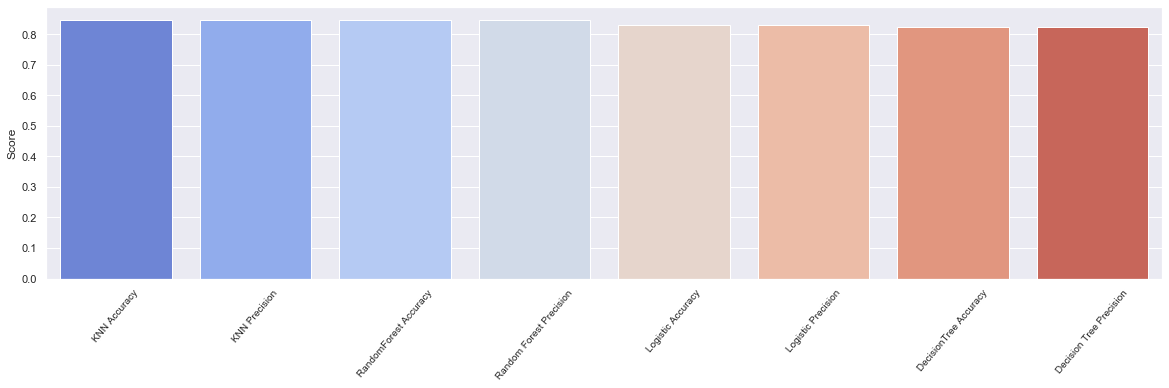

In [70]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_accu_dict.index,y = t2_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics

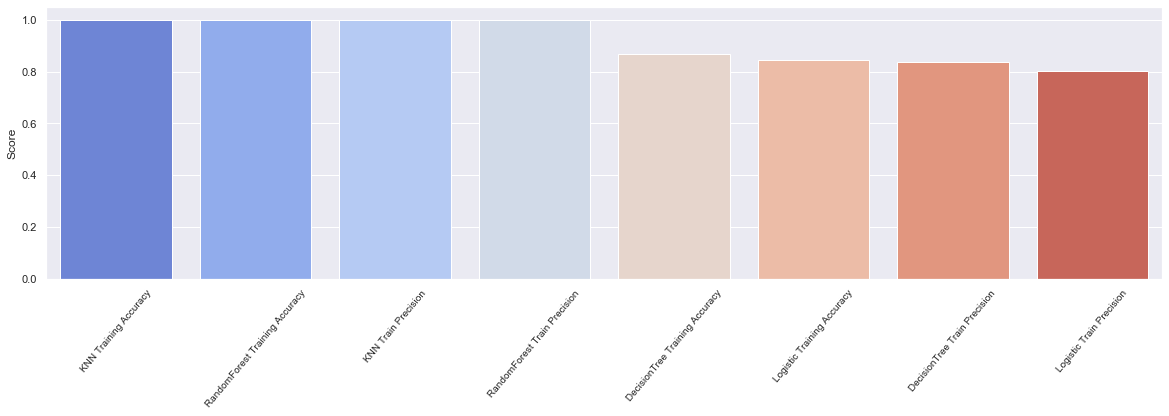

In [71]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_train_dict.index,y = t2_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics

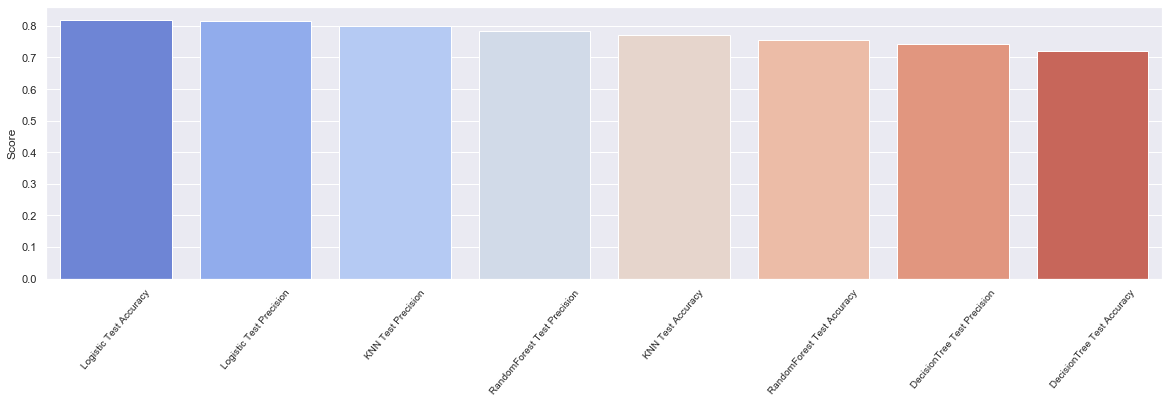

In [72]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_test_dict.index,y = t2_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics With Optimal Hyperparameter

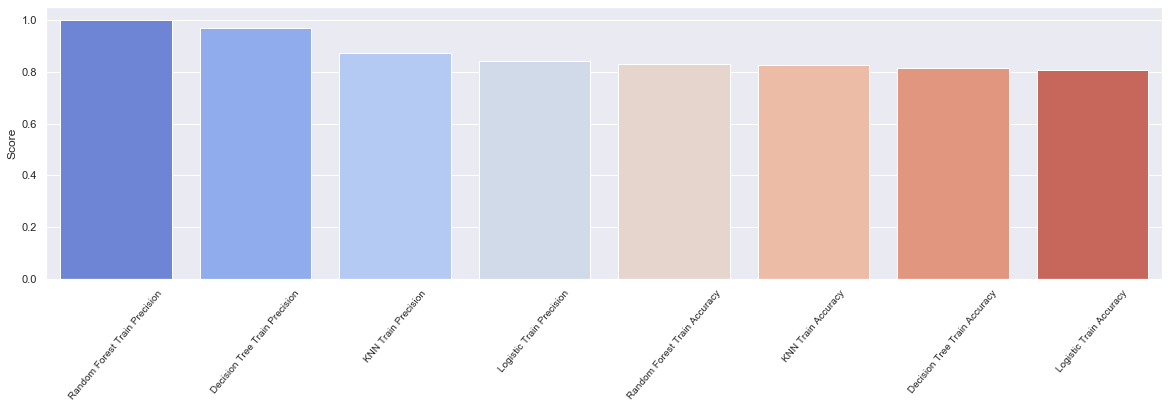

In [73]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_optimal_train_dict.index,y = t2_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics With Optimal Hyperparameter

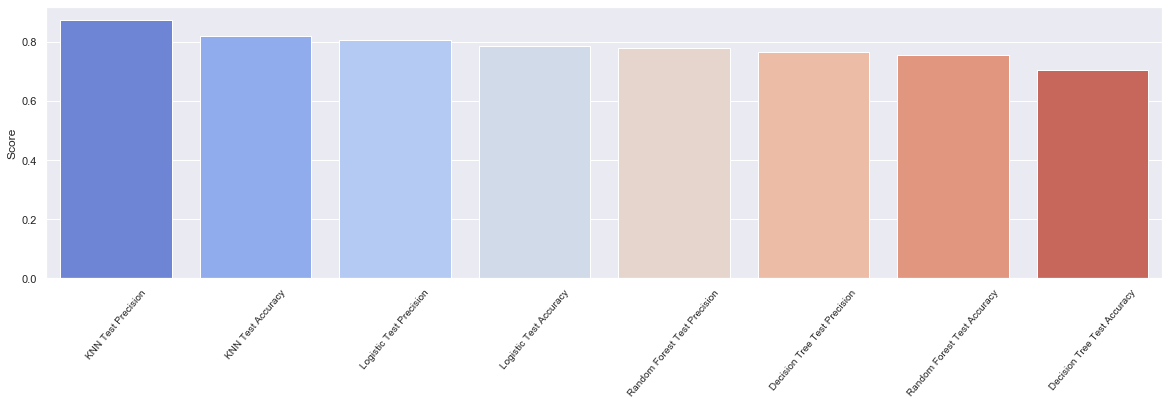

In [74]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t2_df_optimal_test_dict.index,y = t2_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t2_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

# Trial 3

In [75]:
# To store results of models in trial 1
t3_accu_dict = {}

t3_train_dict = {}
t3_test_dict = {}

t3_optimal_train_dict = {}
t3_optimal_test_dict = {}

In [76]:
from sklearn.model_selection import train_test_split
# train, test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X,y, test_size=0.2, random_state = 242161)

standardscale = StandardScaler()
X3_train = standardscale.fit_transform(X3_train)
X3_test = standardscale.transform(X3_test)
y3_train  = y3_train.to_numpy()
y3_test = y3_test.to_numpy()
print("Shape of input data X_train: {} and shape of target variable y_train: {}".format(X3_train.shape, y3_train.shape))
print("Shape of input data X_test: {} and shape of target variable y_test: {}".format(X3_test.shape, y3_test.shape))

Shape of input data X_train: (242, 13) and shape of target variable y_train: (242,)
Shape of input data X_test: (61, 13) and shape of target variable y_test: (61,)


## Accuracy Performance

### Model 'refit' set to accuracy

In [77]:
%%time
# run the train_algo function and train the data on the models
train_algo(gridcvs, X3_train, y3_train, 5)

outer fold 1/5 | tuning DecisionTree | inner ACC 78.51% | outer ACC 71.43%
outer fold 1/5 | tuning KNN      | inner ACC 82.65% | outer ACC 79.59%
outer fold 1/5 | tuning Logistic | inner ACC 78.26% | outer ACC 83.67%
outer fold 1/5 | tuning RandomForest | inner ACC 79.62% | outer ACC 85.71%
outer fold 2/5 | tuning DecisionTree | inner ACC 76.39% | outer ACC 63.27%
outer fold 2/5 | tuning KNN      | inner ACC 81.27% | outer ACC 81.63%
outer fold 2/5 | tuning Logistic | inner ACC 78.73% | outer ACC 83.67%
outer fold 2/5 | tuning RandomForest | inner ACC 81.81% | outer ACC 79.59%
outer fold 3/5 | tuning DecisionTree | inner ACC 77.44% | outer ACC 72.92%
outer fold 3/5 | tuning KNN      | inner ACC 81.17% | outer ACC 79.17%
outer fold 3/5 | tuning Logistic | inner ACC 78.99% | outer ACC 83.33%
outer fold 3/5 | tuning RandomForest | inner ACC 79.67% | outer ACC 81.25%
outer fold 4/5 | tuning DecisionTree | inner ACC 81.55% | outer ACC 66.67%
outer fold 4/5 | tuning KNN      | inner ACC 80.9

Accuracy 81.00% (average over CV test folds)
Training Accuracy: 81.40%
Test Accuracy: 86.89%
Wall time: 14.6 s


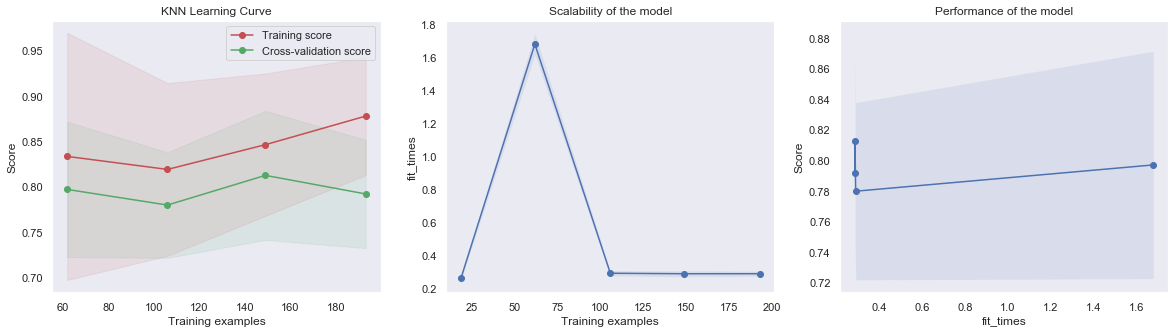

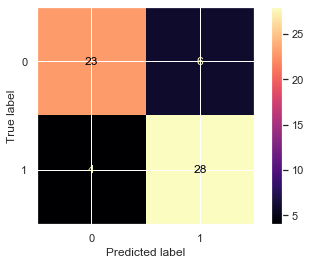

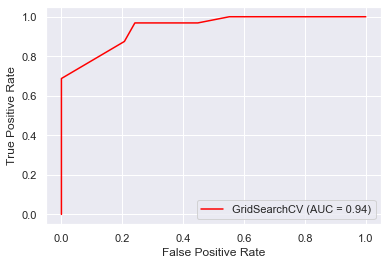

In [78]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo(t3_algo('KNN'), 'KNN', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'KNN Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X3_test, y3_test, c ='red');

Accuracy 81.85% (average over CV test folds)
Training Accuracy: 100.00%
Test Accuracy: 93.44%
Wall time: 5min 11s


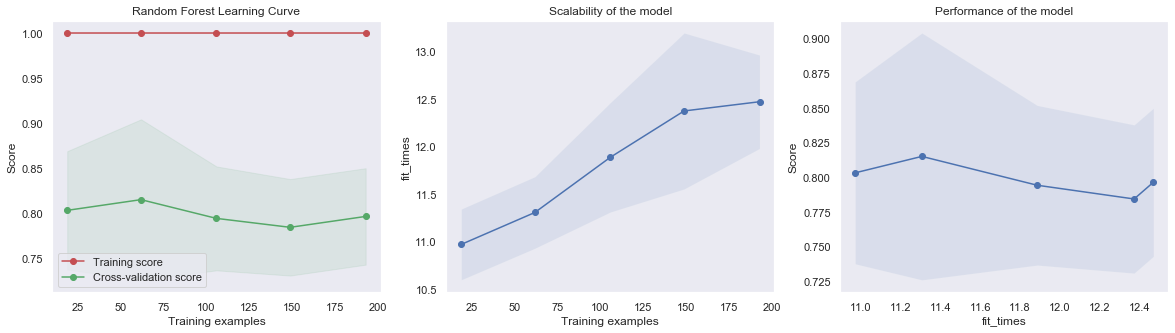

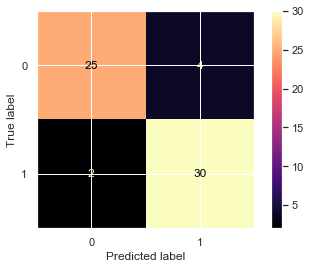

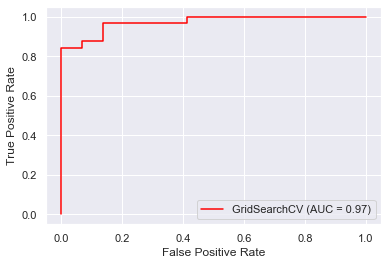

In [79]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to RF
fit_algo(t3_algo('RandomForest'), 'RandomForest', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'RandomForest Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X3_test, y3_test, c ='red');

Accuracy 82.24% (average over CV test folds)
Training Accuracy: 82.23%
Test Accuracy: 91.80%
Wall time: 8.28 s


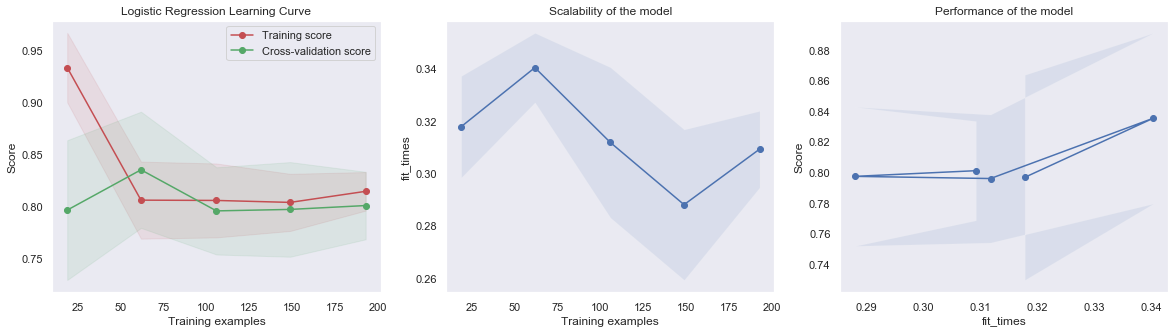

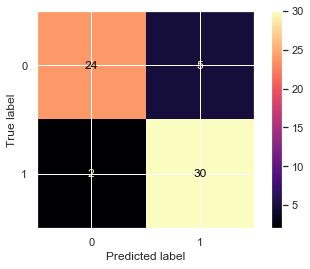

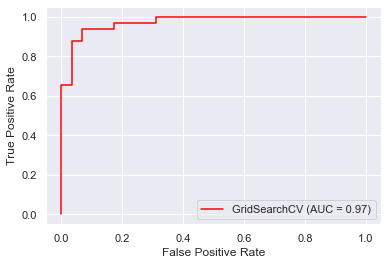

In [80]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to Logistic Regression
fit_algo(t3_algo('Logistic'), 'Logistic', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Logistic Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X3_test, y3_test, c ='red');

Accuracy 73.96% (average over CV test folds)
Training Accuracy: 99.17%
Test Accuracy: 85.25%
Wall time: 6.71 s


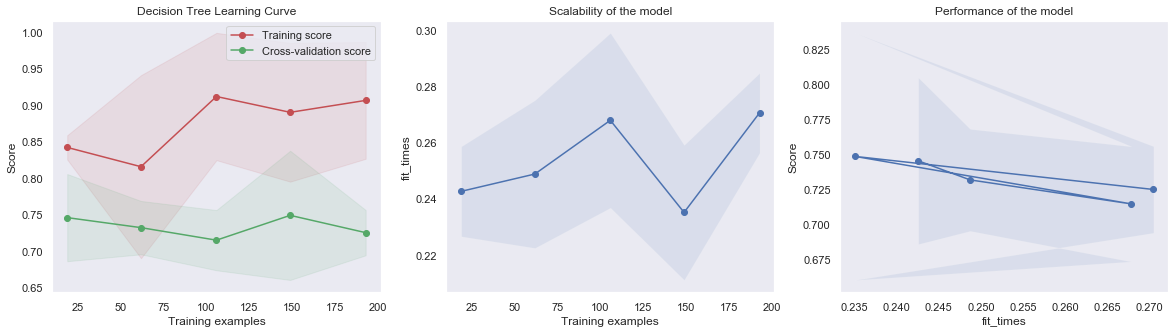

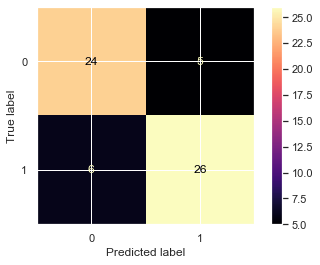

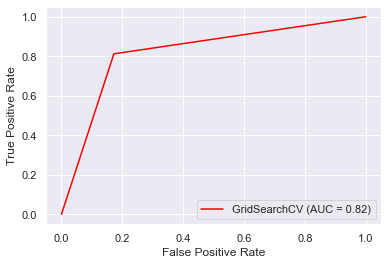

In [81]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to Decision Tree
fit_algo(t3_algo('DecisionTree'), 'DecisionTree', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'DecisionTree Accuracy', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X3_test, y3_test, c ='red');

In [82]:
%%time
# run the optimized function and apply optimal parameters to algorithms and look at training/testing scores
optimized('uniform', 10, 1, .1, 1, 'l2', X3_train, y3_train, X3_test, y3_test,t3_optimal_train_dict,t3_optimal_test_dict)

KNN Train Accuracy 0.7893707482993197
KNN Test Accuracy 0.9344262295081968
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61

Random Forest Train Accuracy 0.8143707482993197
Random Forest Test Accuracy 0.9344262295081968
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61

Logistic Train Accuracy 0.8142006802721088
Logistic Test Accuracy 0.8852459016393442
              precision    recall  f1-score   support

           0       0.92      0.83   

## Precision Performance

### Model 'refit' set to precision

In [83]:
train_algo_prec(gridcvs, X3_train, y3_train, 5)

outer fold 1/5 | tuning DecisionTree | inner prec 78.64% | outer prec 72.22%
outer fold 1/5 | tuning KNN      | inner prec 82.65% | outer prec 81.48%
outer fold 1/5 | tuning Logistic | inner prec 78.26% | outer prec 78.79%
outer fold 1/5 | tuning RandomForest | inner prec 79.29% | outer prec 78.79%
outer fold 2/5 | tuning DecisionTree | inner prec 75.58% | outer prec 70.00%
outer fold 2/5 | tuning KNN      | inner prec 81.27% | outer prec 80.00%
outer fold 2/5 | tuning Logistic | inner prec 78.73% | outer prec 80.65%
outer fold 2/5 | tuning RandomForest | inner prec 82.28% | outer prec 79.31%
outer fold 3/5 | tuning DecisionTree | inner prec 78.03% | outer prec 73.33%
outer fold 3/5 | tuning KNN      | inner prec 81.17% | outer prec 75.76%
outer fold 3/5 | tuning Logistic | inner prec 78.99% | outer prec 78.79%
outer fold 3/5 | tuning RandomForest | inner prec 79.73% | outer prec 74.19%
outer fold 4/5 | tuning DecisionTree | inner prec 81.12% | outer prec 73.08%
outer fold 4/5 | tuning

Precision 81.00% (average over CV test folds)
Training Precision: 78.57%
Test Precision: 81.58%
Wall time: 14.5 s


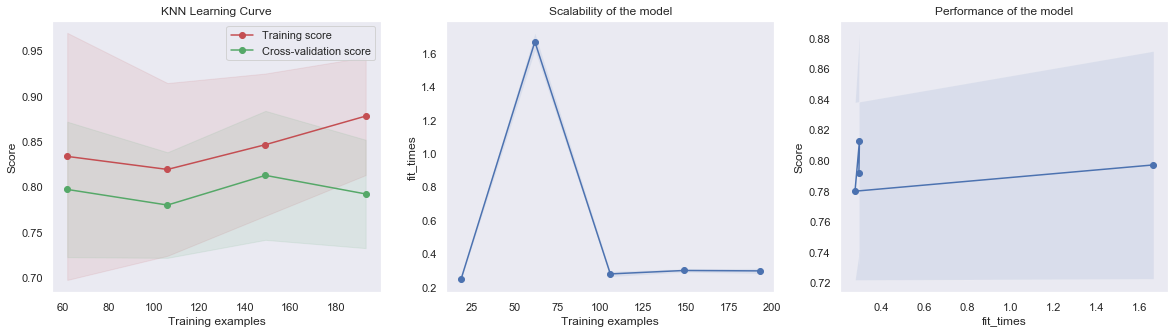

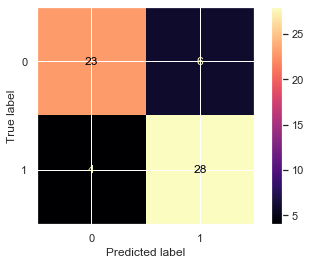

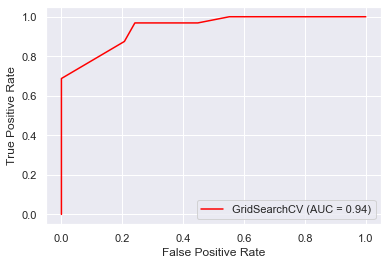

In [84]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['KNN'], 'KNN Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('KNN'), 'KNN', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'KNN Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['KNN'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['KNN'], X3_test, y3_test, c ='red');

Precision 81.85% (average over CV test folds)
Training Precision: 100.00%
Test Precision: 96.67%
Wall time: 5min 18s


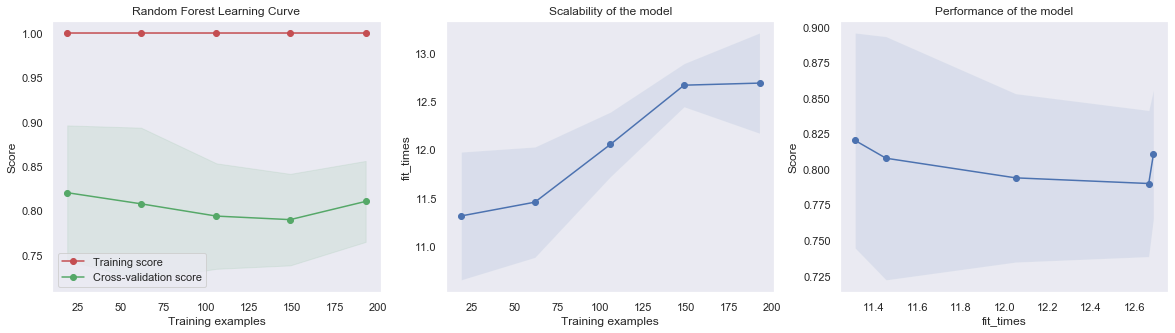

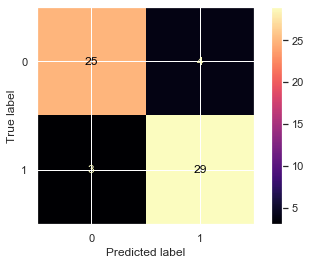

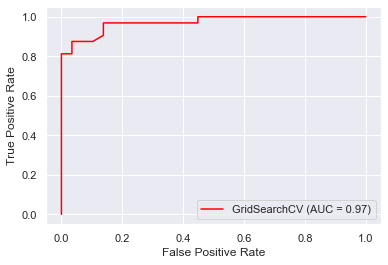

In [85]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['RandomForest'], 'Random Forest Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('RandomForest'), 'RandomForest', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Random Forest Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['RandomForest'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['RandomForest'], X3_test, y3_test, c ='red');

Precision 82.24% (average over CV test folds)
Training Precision: 79.61%
Test Precision: 90.91%
Wall time: 8.5 s


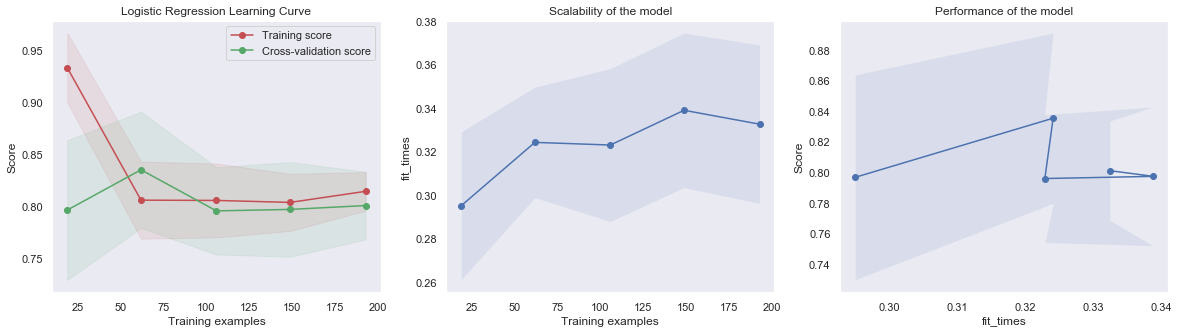

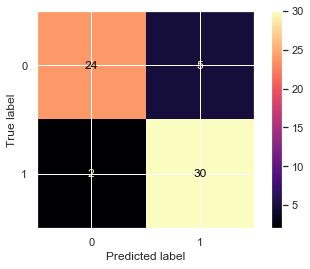

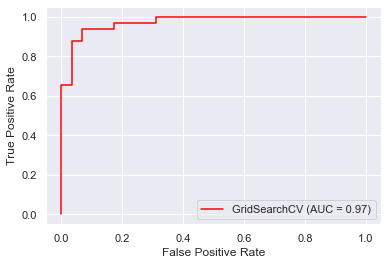

In [86]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['Logistic'], 'Logistic Regression Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('Logistic'), 'Logistic', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Logistic Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['Logistic'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['Logistic'], X3_test, y3_test, c ='red');

Precision 73.17% (average over CV test folds)
Training Precision: 87.97%
Test Precision: 87.88%
Wall time: 6.7 s


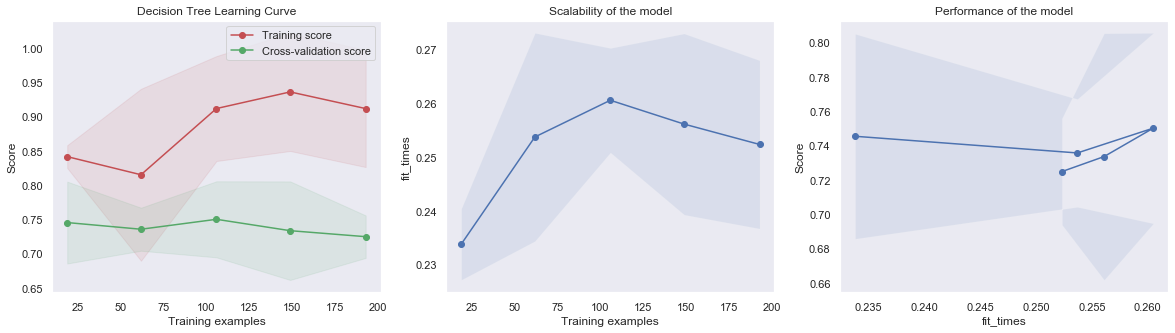

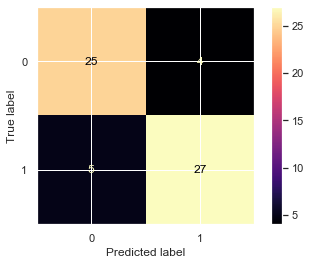

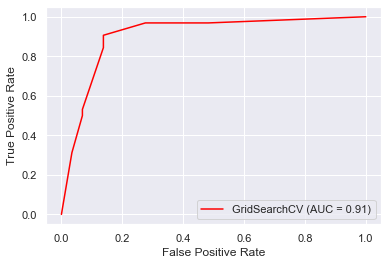

In [87]:
%%time
# plot learning curves for training
plot_learning_curve(gridcvs['DecisionTree'], 'Decision Tree Learning Curve', X3_train, y3_train);
# run the fit algo function and fit all the training data to KNN
fit_algo_prec(t3_algo('DecisionTree'), 'DecisionTree', X3_train, y3_train, X3_test, y3_test, t3_accu_dict,'Decision Tree Precision', t3_train_dict, t3_test_dict)
# plot confusion matrix on the test samples
plot_confusion_matrix(gridcvs['DecisionTree'], X3_test, y3_test, cmap = 'magma')
# plot ROC curve on the test samples
plot_roc_curve(gridcvs['DecisionTree'], X3_test, y3_test, c ='red');

In [88]:
optimized_prec('uniform', 10, 1, .1, 5, 'l2', X3_train, y3_train, X3_test, y3_test,t3_optimal_train_dict,t3_optimal_test_dict)

KNN Train Precision 0.8712121212121212
KNN Test Precision 0.9375
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61

Random Forest Train Precision 1.0
Random Forest Test Precision 0.9375
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        29
           1       0.94      0.94      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61

Logistic Train Precision 0.7908496732026143
Logistic Test Precision 0.8571428571428571
              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1   

## Results: Trial 3

In [89]:
t3_df_accu_dict = pd.DataFrame.from_dict(t3_accu_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_train_dict = pd.DataFrame.from_dict(t3_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_test_dict = pd.DataFrame.from_dict(t3_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_optimal_train_dict = pd.DataFrame.from_dict(t3_optimal_train_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)
t3_df_optimal_test_dict = pd.DataFrame.from_dict(t3_optimal_test_dict,orient = "index",columns=["Score"]).sort_values(by=["Score"], ascending=False)

In [90]:
print("Average Accuracy Across Folds")
print(t3_df_accu_dict)
print("")
print("Training Metric Scores")
print(t3_df_train_dict)
print("")
print("Testing Metric Scores")
print(t3_df_test_dict)
print("")
print("Training Metric Scores For Optimal Parameter")
print(t3_df_optimal_train_dict)
print("")
print("Testing Metric Scores For Optimal Parameter")
print(t3_df_optimal_test_dict)

Average Accuracy Across Folds
                            Score
Logistic Accuracy        0.822364
Logistic Precision       0.822364
RandomForest Accuracy    0.818452
Random Forest Precision  0.818452
KNN Accuracy             0.810034
KNN Precision            0.810034
DecisionTree Accuracy    0.739626
Decision Tree Precision  0.731718

Training Metric Scores
                                   Score
RandomForest Training Accuracy  1.000000
RandomForest Train Precision    1.000000
DecisionTree Training Accuracy  0.991736
DecisionTree Train Precision    0.879699
Logistic Training Accuracy      0.822314
KNN Training Accuracy           0.814050
Logistic Train Precision        0.796053
KNN Train Precision             0.785714

Testing Metric Scores
                                Score
RandomForest Test Precision  0.966667
RandomForest Test Accuracy   0.934426
Logistic Test Accuracy       0.918033
Logistic Test Precision      0.909091
DecisionTree Test Precision  0.878788
KNN Test Accuracy   

## Visualizations

### Average Accuracies Across Folds

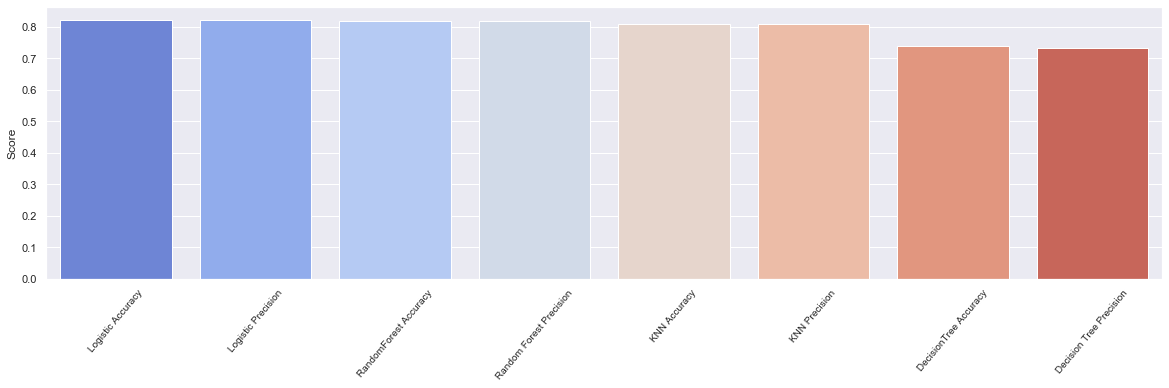

In [91]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_accu_dict.index,y = t3_df_accu_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_accu_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics

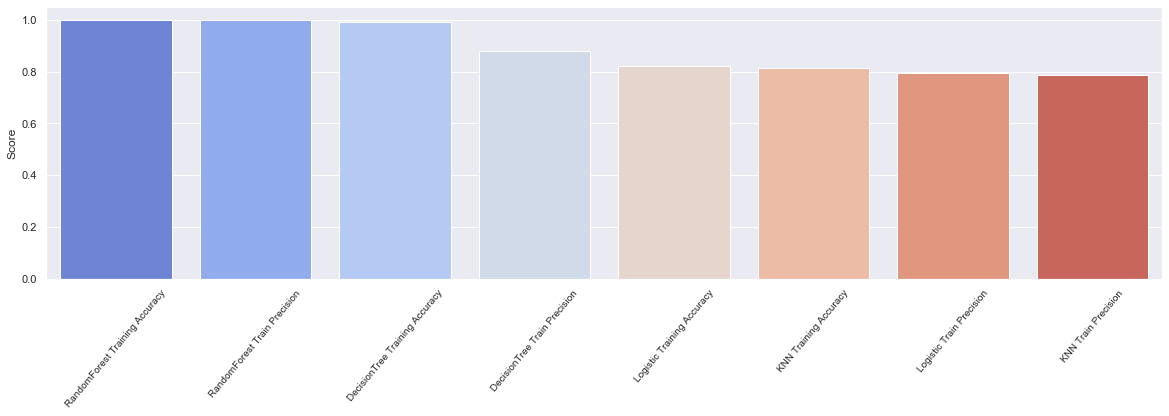

In [92]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_train_dict.index,y = t3_df_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics

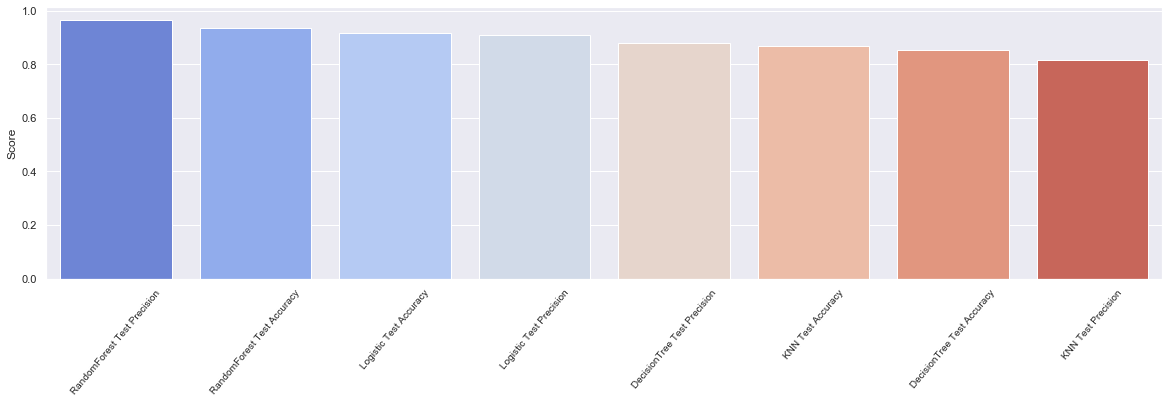

In [93]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_test_dict.index,y = t3_df_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Training Scores Across Error Metrics With Optimal Hyperparameter

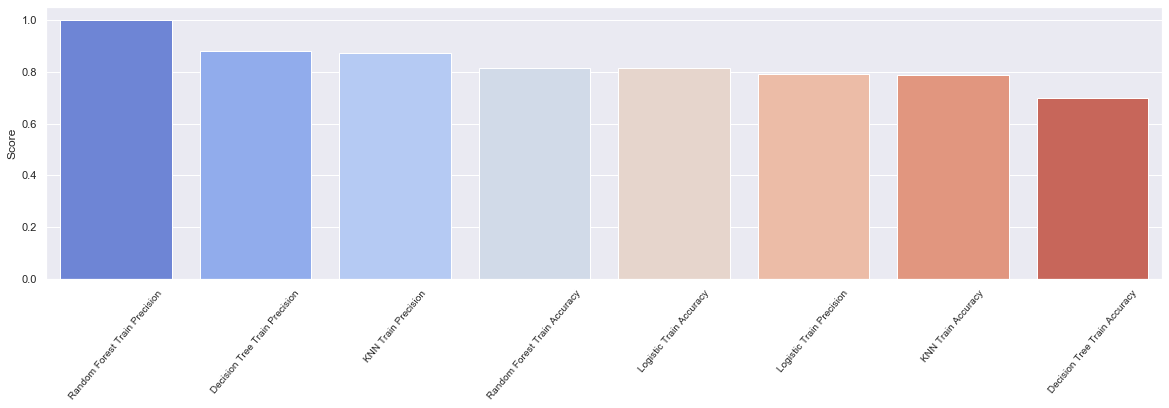

In [94]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_optimal_train_dict.index,y = t3_df_optimal_train_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_optimal_train_dict.index,rotation = 50, fontsize = 10)

plt.show()

### Algorithm Testing Scores Across Error Metrics With Optimal Hyperparameter

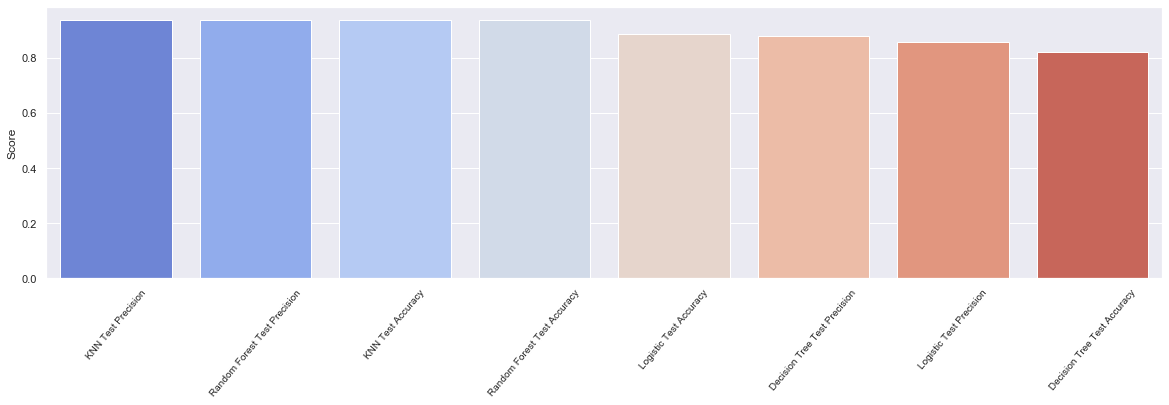

In [95]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = t3_df_optimal_test_dict.index,y = t3_df_optimal_test_dict.Score, 
            palette = 'coolwarm').set_xticklabels(t3_df_optimal_test_dict.index,rotation = 50, fontsize = 10)

plt.show()

# Results: All Trials

## Averaging Results Across Trials

### Average Accuracy 

In [96]:
# taking the average across all 3 trials for average accuracy across 5 folds
df_avearge_accuracy = pd.concat([t1_df_accu_dict, t2_df_accu_dict, t2_df_accu_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_accuracy

Score
KNN Accuracy             0.845862
KNN Precision            0.845862
Random Forest Precision  0.845720
RandomForest Accuracy    0.844416
Logistic Accuracy        0.830782
Logistic Precision       0.830782
Decision Tree Precision  0.812642
DecisionTree Accuracy    0.812642

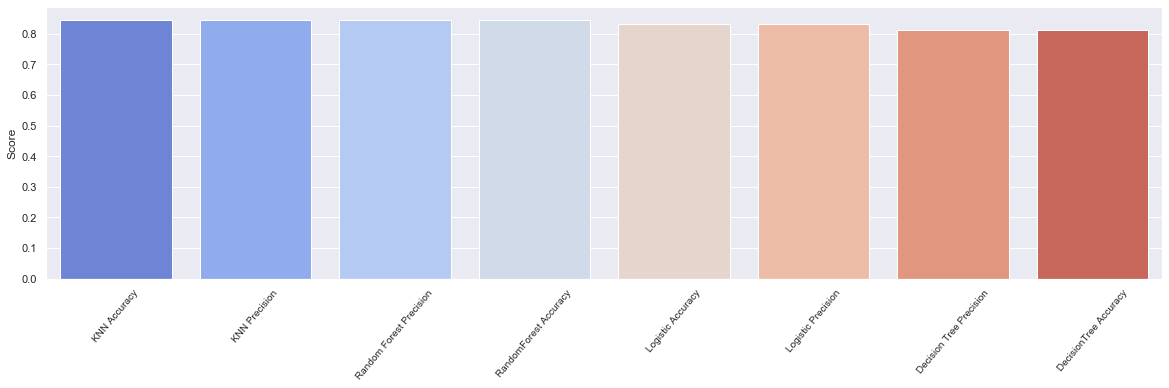

In [97]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_accuracy.index,y = df_avearge_accuracy.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_accuracy.index,rotation = 50, fontsize = 10)

plt.show()

### Average Training Scores

In [98]:
df_avearge_train = pd.concat([t1_df_train_dict, t2_df_train_dict, t3_df_train_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_train

Score
RandomForest Train Precision    1.000000
RandomForest Training Accuracy  1.000000
KNN Training Accuracy           0.938017
KNN Train Precision             0.928571
DecisionTree Training Accuracy  0.906336
DecisionTree Train Precision    0.851772
Logistic Training Accuracy      0.833333
Logistic Train Precision        0.797122

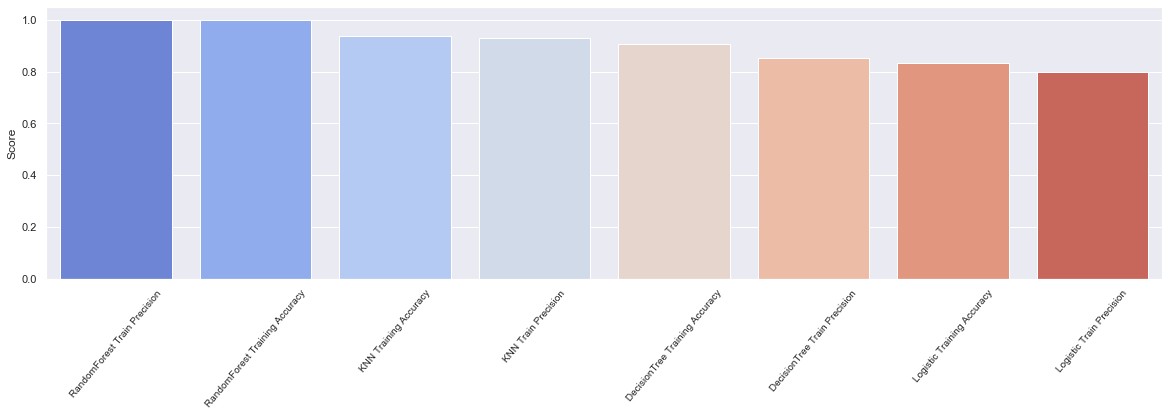

In [99]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_train.index,y = df_avearge_train.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_train.index,rotation = 50, fontsize = 10)

plt.show()

### Average Testing Scores

In [100]:
df_avearge_test = pd.concat([t1_df_test_dict, t2_df_test_dict, t3_df_test_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_test

Score
RandomForest Test Precision  0.855088
Logistic Test Accuracy       0.846995
Logistic Test Precision      0.839328
RandomForest Test Accuracy   0.830601
KNN Test Accuracy            0.808743
DecisionTree Test Precision  0.793666
KNN Test Precision           0.788596
DecisionTree Test Accuracy   0.781421

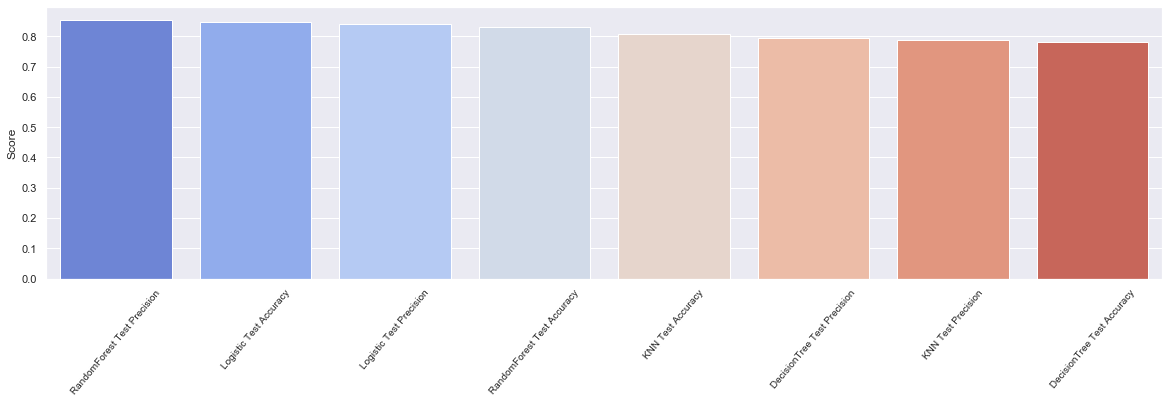

In [101]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_test.index,y = df_avearge_test.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_test.index,rotation = 50, fontsize = 10)

plt.show()

### Average Training Scores With Optimal Parameters

In [102]:
df_avearge_optimal_train = pd.concat([t1_df_optimal_train_dict, t2_df_optimal_train_dict, t3_df_optimal_train_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_optimal_train

Score
Random Forest Train Precision  1.000000
Decision Tree Train Precision  0.864389
KNN Train Precision            0.856023
Random Forest Train Accuracy   0.821088
Logistic Train Accuracy        0.816893
Logistic Train Precision       0.814677
KNN Train Accuracy             0.814144
Decision Tree Train Accuracy   0.749320

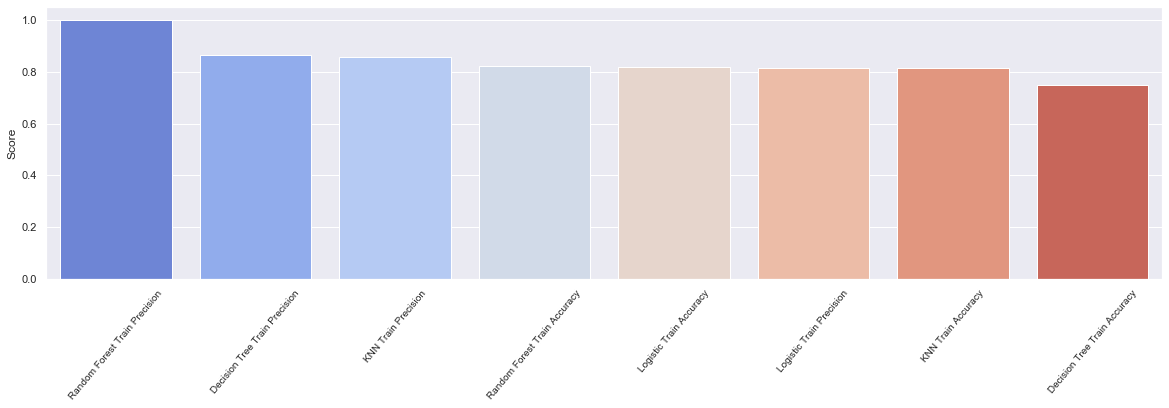

In [103]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_optimal_train.index,y = df_avearge_optimal_train.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_optimal_train.index,rotation = 50, fontsize = 10)

plt.show()

### Average Testing Scores With Optimal Parameters

In [104]:
df_avearge_optimal_test = pd.concat([t1_df_optimal_test_dict, t2_df_optimal_test_dict, t3_df_optimal_test_dict], 
                                axis = 0,join='inner').T.groupby(lambda x:x,
                                                                 axis=1).sum().div(3).T.sort_values(by=["Score"],
                                                                                                    ascending=False)
df_avearge_optimal_test

Score
KNN Test Precision            0.859722
Random Forest Test Precision  0.853811
KNN Test Accuracy             0.846995
Random Forest Test Accuracy   0.836066
Logistic Test Precision       0.825838
Logistic Test Accuracy        0.825137
Decision Tree Test Precision  0.783779
Decision Tree Test Accuracy   0.759563

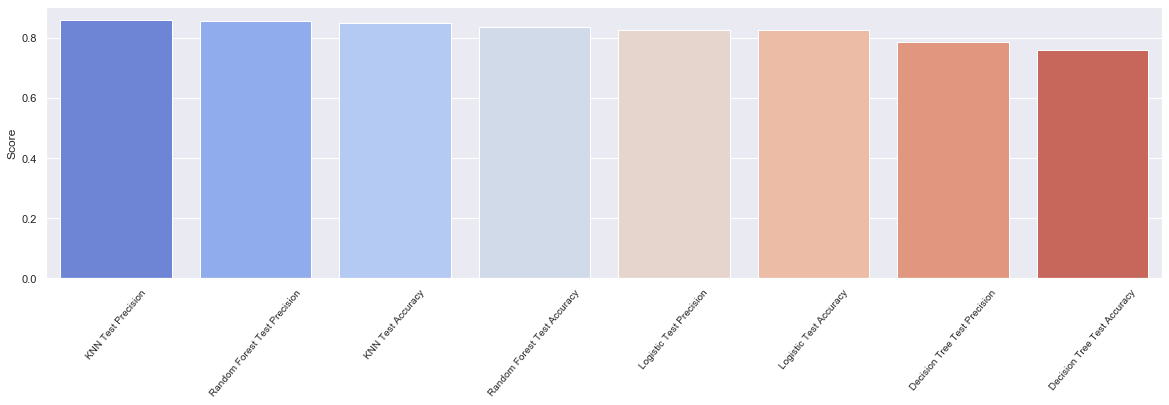

In [105]:
fig = plt.figure(figsize = (20,5))

sns.barplot(x = df_avearge_optimal_test.index,y = df_avearge_optimal_test.Score, 
            palette = 'coolwarm').set_xticklabels(df_avearge_optimal_test.index,rotation = 50, fontsize = 10)

plt.show()